@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

# Temperature Forecast Project using ML

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

## Problem Statement:
`Data Set Information:`

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.


`Attribute Information:`

1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

### `There are two target variables here:`

1) Next_Tmax: Next day maximum temperature

2) Next_Tmin: Next day  minimum temperature



In [1]:
#Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Extract dataset csv file

data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv')

In [3]:
data.tail(20) #to display the datset last 20 rows

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
7732      8.0  30-08-2017          22.5          16.5    23.428869   
7733      9.0  30-08-2017          23.3          15.8    29.709179   
7734     10.0  30-08-2017          21.4          14.1    25.229910   
7735     11.0  30-08-2017          23.0          16.5    28.319260   
7736     12.0  30-08-2017          23.8          15.4    25.464573   
7737     13.0  30-08-2017          23.8          17.1    28.521656   
7738     14.0  30-08-2017          23.1          17.2    21.468115   
7739     15.0  30-08-2017          23.4          16.1    22.562298   
7740     16.0  30-08-2017          21.7          15.2    27.868839   
7741     17.0  30-08-2017          22.6          14.6    35.059216   
7742     18.0  30-08-2017          23.3          18.2    30.259682   
7743     19.0  30-08-2017          22.6          15.0    25.536045   
7744     20.0  30-08-2017          22.7          15.9    38.216373   
7745     21.0  30-08-2017          23.1          17.8    24.688997   
7746     22.0  30-08-2017          22.5          17.4    30.094858   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
7732    83.089272         26.804746         18.047354   6.742729   64.152702   
7733    90.403275         25.799004         17.383095   5.805489  108.981960   
7734    86.536469         25.878358         16.993471   6.542819   69.655613   
7735    82.678833         27.354836         17.934175   6.031364   44.483636   
7736    78.012566         26.860758         17.560685   7.411646   19.791088   
7737    81.337837         27.094065         17.444269   5.693622   48.882029   
7738    74.958038         27.659242         18.721456   6.990299   17.905112   
7739    75.351555         27.451492         18.612977   7.041802   20.186169   
7740    85.979271         26.400334         17.217080   6.395609   82.487679   
7741    89.616730         26.112684         16.446214   5.147585  118.735384   
7742    86.565193         26.474403         17.289157   6.522731   94.203783   
7743    78.779045         26.596280         17.856040   6.905963   54.030075   
7744    94.428116         24.037222         15.772677   6.478060  112.580310   
7745    78.261383         27.812697         18.303014   6.603253    9.614074   
7746    83.690018         26.704905         17.814038   5.768083   82.146707   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
7732  ...    0.000000    0.000000    0.000000  37.4697  126.910   52.5180   
7733  ...    0.000000    0.000000    0.000000  37.4967  126.826   50.9312   
7734  ...    0.000000    0.000000    0.000000  37.4562  126.955  208.5070   
7735  ...    0.000000    0.000000    0.000000  37.5372  127.085   28.7000   
7736  ...    0.000000    0.000000    0.000000  37.5507  126.988  132.1180   
7737  ...    0.000000    0.000000    0.000000  37.5776  127.083   59.8324   
7738  ...    0.000000    0.000000    0.000000  37.4967  126.927   30.9680   
7739  ...    0.000000    0.000000    0.000000  37.5507  126.937   30.0464   
7740  ...    0.000000    0.000000    0.000000  37.4697  126.995   82.2912   
7741  ...    0.000000    0.000000    0.000000  37.6181  127.099   53.4712   
7742  .

In [4]:
data.shape  #To check the dataset dimension

(7752, 25)

### Our dataset contains 7752 rows and 25 columns

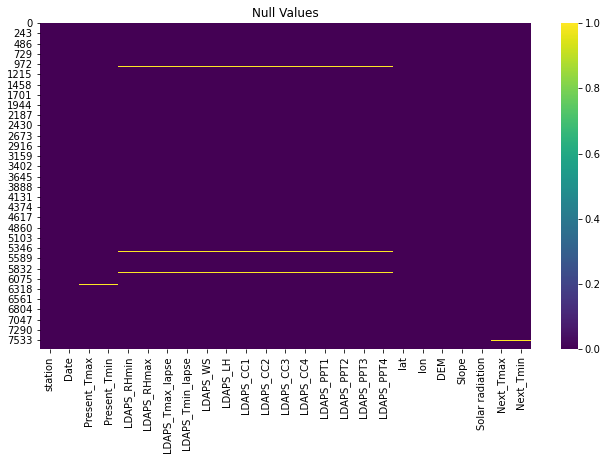

In [5]:
#Let's visualize to check the nullvalues in our dataset

plt.figure(figsize = [11,6])
sns.heatmap(data.isnull(),cmap = 'viridis')
plt.title('Null Values')
plt.show()

In [6]:
data.isna().sum()  #To check the total null values in all the columns individually

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

We coukd see that we have many features with the above total count of null values and we need to replace these nan values with some meaningful information

In [7]:
data.columns  #To check the column names

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [8]:
data[data['station'].isnull()]   #Let's check the rows with null value in "Station" column 

station Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
7750      NaN  NaN          20.0          11.3    19.794666    58.936283   
7751      NaN  NaN          37.6          29.9    98.524734   100.000153   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  ...  \
7750         17.624954         14.272646   2.882580  -13.603212  ...   
7751         38.542255         29.619342  21.857621  213.414006  ...   

      LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon      DEM     Slope  \
7750    0.000000    0.000000    0.000000  37.4562  126.826   12.370  0.098475   
7751   21.621661   15.841235   16.655469  37.6450  127.135  212.335  5.178230   

      Solar radiation  Next_Tmax  Next_Tmin  
7750      4329.520508       17.4       11.3  
7751      5992.895996       38.9       29.8  

[2 rows x 25 columns]

In [3]:
data.head(30)

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0       1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1       2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2       3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3       4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4       5.0  30-06-2013          31.4          21.9    56.174095    90.155128   
5       6.0  30-06-2013          31.9          23.5    52.437126    85.307251   
6       7.0  30-06-2013          31.4          24.4    56.287189    81.019760   
7       8.0  30-06-2013          32.1          23.6    52.326218    78.004539   
8       9.0  30-06-2013          31.4          22.0    55.338791    80.784607   
9      10.0  30-06-2013          31.6          20.5    56.651203    86.849632   
10     11.0  30-06-2013          31.7          23.5    51.156395    85.385635   
11     12.0  30-06-2013          31.6          22.2    51.288349    80.338013   
12     13.0  30-06-2013          32.1          23.8    48.767929    84.008163   
13     14.0  30-06-2013          31.3          23.8    50.745735    74.498810   
14     15.0  30-06-2013          32.5          23.6    51.773392    72.999237   
15     16.0  30-06-2013          30.7          21.4    56.848339    84.408173   
16     17.0  30-06-2013          32.1          20.1    54.352501    93.218315   
17     18.0  30-06-2013          32.8          23.8    56.144707    88.364731   
18     19.0  30-06-2013          31.4          22.8    52.265926    75.483757   
19     20.0  30-06-2013          30.9          22.2    61.493835    95.245232   
20     21.0  30-06-2013          32.0          23.6    49.576046    81.601669   
21     22.0  30-06-2013          32.2          23.9    54.512455    88.524696   
22     23.0  30-06-2013          32.7          24.4    54.705585    75.919823   
23     24.0  30-06-2013          31.5          25.0    52.072784    73.693947   
24     25.0  30-06-2013          32.5          24.2    50.274609    75.525017   
25      1.0  01-07-2013          28.3          21.2    72.798576    97.642792   
26      2.0  01-07-2013          30.5          22.9    65.730690    92.949387   
27      3.0  01-07-2013          30.3          24.5    62.743576    90.568283   
28      4.0  01-07-2013          31.0          24.5    74.534218    97.630035   
29      5.0  01-07-2013          30.8          22.6    72.636543    94.365204   

    LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  ...  \
0          28.074101         23.006936   6.818887   69.451805  ...   
1          29.850689         24.035009   5.691890   51.937448  ...   
2          30.091292         24.565633   6.138224   20.573050  ...   
3          29.704629         23.326177   5.650050   65.727144  ...   
4          29.113934         23.486480   5.735004  107.965535  ...   
5          29.219342         23.822613   6.182295   50.231389  ...   
6          28.551859         24.238467   5.587135  125.110007  ...   
7          28.851982         23.819054   6.104417   42.011547  ...   
8          28.426975         23.332373   6.017135   85.110971  ...   
9          27.576705         22.527018   6.518841   63.006075  ...   
10         29.694724         24.432646   6.411812   55.690312  ...   
11         28.936314         24.365949   6.423993   28.719288  ...   
12         29.929272         24.281750   5.988361   32.039448  ...   
13         29.498526         24.459427   6.319478   16.835611  ...   
14         29.640103         25.152909   6.360547   32.275122  ...   
15         28.476517         23.695151   5.639549   83.417605  ...   
16         29.321525         23.036163   5.497787   97.971438  ...   
17         28.676175         23.448165   5.665435   81.938271  ...   
18         29.273668         24.970151   6.359286   36.339969  ...   
19         28.502989         23.031539   6.814792   70.166936  ...   
20         29.976196  

If we look in our datasheet, then, 

- for every 25th row, the date changes to next day and every 26th row the "Station" starts "from 1.0 to 25.0" and so on
- So, as we can see that the last 2 rows of the datset has the null values for Station and Date column
- Let's fill up these rows with the same trend which is being repeated in the whole dataset
- We will fill 'Date': '31-08-2017' for the Date column null values and
- on 7750th row starts as the 26th row, so lets fill up Station data "1.0 for 7750th row and 2.0 for 7751th row"

In [4]:
data.fillna({'Date': '31-08-2017'}, inplace=True)    

In [5]:
data[data['station'].isnull()]

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
7750      NaN  31-08-2017          20.0          11.3    19.794666   
7751      NaN  31-08-2017          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon      DEM  \
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.370   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.335   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[2 rows x 25 columns]

In [12]:
data['Solar radiation'].tail(2)

7750    4329.520508
7751    5992.895996
Name: Solar radiation, dtype: float64

In [9]:
data['station'].unique()      #

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., nan])

In [6]:
data.loc[data['Solar radiation']== 4329.520508, 'station'] = 1.0
data.loc[data['Solar radiation']== 5992.895996, 'station'] = 2.0

In [7]:
data.tail(2)  #let's display whether the entry for null values are correct

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
7750      1.0  31-08-2017          20.0          11.3    19.794666   
7751      2.0  31-08-2017          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon      DEM  \
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.370   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.335   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[2 rows x 25 columns]

- So, that "Station and Date" columns are filled up with the same trend

In [15]:
data.isna().sum()  #Let's recheck the left null values

station              0
Date                 0
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [17]:
data.info()  #information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7752 non-null   float64
 1   Date              7752 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


- All the null values are present in columns with float datatype

In [8]:
#Let's fill up all these null values in the float dataype with it's respective column mean

for i in data.columns:
    if data[i].dtypes == 'float64':
        data[i]=data[i].fillna(data[i].mean())  

In [20]:
data.isna().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

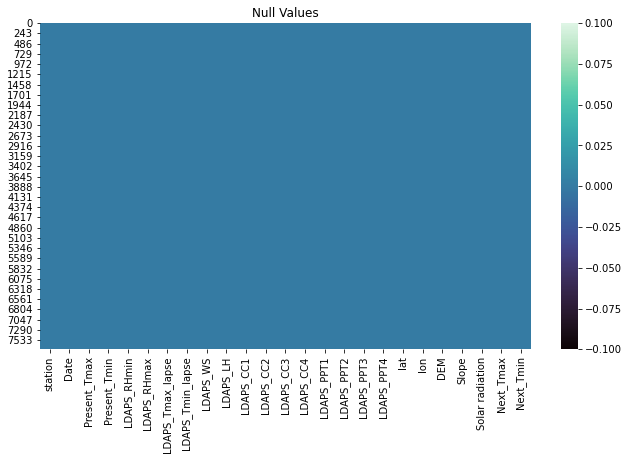

In [19]:
#Let's visualize to check the nullvalues in our dataset

plt.figure(figsize = [11,6])
sns.heatmap(data.isnull(),cmap = 'mako')
plt.title('Null Values')
plt.show()

Our dataset contains with no null values

In [21]:
data.describe()  #Let's check the statistical calculation of each column

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7752.000000   7752.000000   7752.000000  7752.000000  7752.000000   
mean     12.996388     29.768211     23.225059    56.759372    88.374804   
std       7.213391      2.956557      2.403036    14.596973     7.157124   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.700000    46.046162    84.316923   
50%      13.000000     29.900000     23.400000    55.313244    89.699505   
75%      19.000000     32.000000     24.900000    67.038254    93.704500   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7752.000000       7752.000000  7752.000000  7752.000000   
mean          29.613447         23.512589     7.097875    62.505019   
std            2.932898          2.333973     2.173245    33.567001   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.693091         22.114651     5.686487    37.532764   
50%           29.662273         23.735942     6.563068    57.310630   
75%           31.683819         25.134000     8.007471    83.904586   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1  ...   LDAPS_PPT2   LDAPS_PPT3   LDAPS_PPT4          lat  \
count  7752.000000  ...  7752.000000  7752.000000  7752.000000  7752.000000   
mean      0.368774  ...     0.485003     0.278200     0.269407    37.544722   
std       0.261185  ...     1.754258     1.156174     1.200364     0.050352   
min       0.000000  ...     0.000000     0.000000     0.000000    37.456200   
25%       0.148321  ...     0.000000     0.000000     0.000000    37.510200   
50%       0.320110  ...     0.000000     0.000000     0.000000    37.550700   
75%       0.571696  ...     0.024276     0.009697     0.000693    37.577600   
max       0.967277  ...    21.621661    15.841235    16.655469    37.645000   

               lon          DEM        Slope  Solar radiation    Next_Tmax  \
count  7752.000000  7752.000000  7752.000000      7752.000000  7752.000000   
mean    126.991397    61.867972     1.257048      5341.502803    30.274887   
std       0.079435    54.279780     1.370444       429.158867     3.122557   
min     126.826000    12.370000     0.098475      4329.520508    17.400000   
25%     126.937000    28.700000     0.271300      4999.018555    28.200000   
50%     126.995000    45.716000     0.618000      5436.345215    30.500000   
75%     127.042000    59.832400     1.767800      5728.316406    32.600000   
max     127.135000   212.335000     5.178230      5992.895996    38.900000   

         Next_Tmin  
count  7752.000000  
mean     22.932220  
std       2.483276  
min      11.300000  
25%      21.400000  
50%      23.100000  
75%      24.600000  
max      29.800000  

[8 rows x 24 columns]

- We have some columns like : "LDAPS_CC1", "LDAPS_PPT2", "LDAPS_PPT3", "LDAPS_PPT4" with most of the data as "0" values

## Exploratory Data Analysis(EDA):

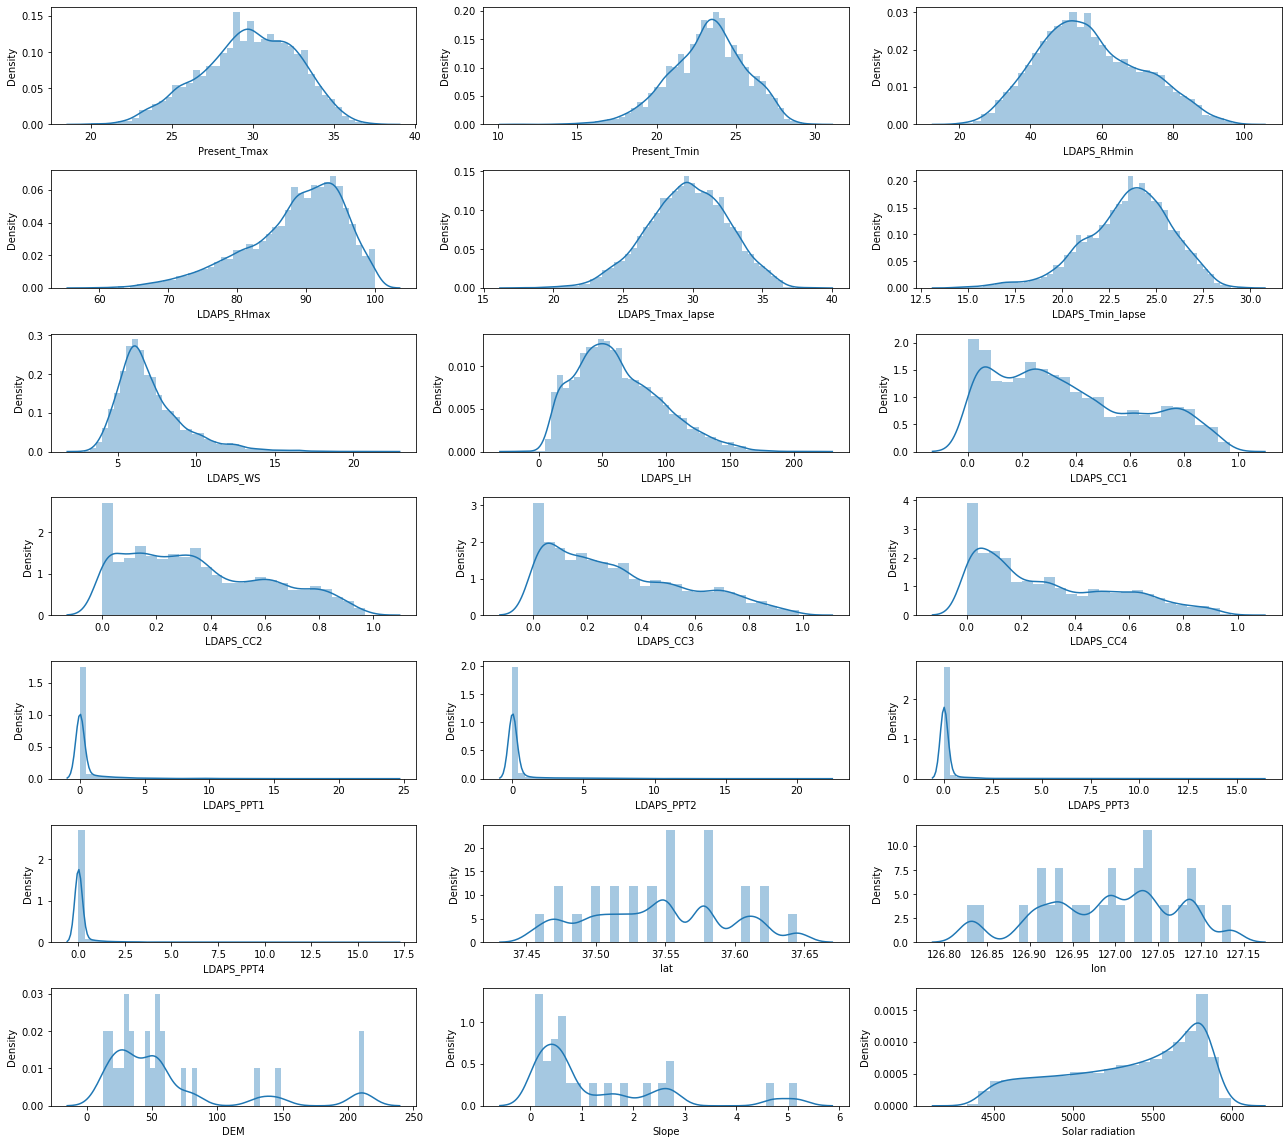

In [23]:
columns = ['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin','LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4','LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4',
        'lat', 'lon','DEM', 'Slope', 'Solar radiation']


plt.figure(figsize=(18,16),facecolor='white')
plotnumber=1
for column in columns:
    if plotnumber<=21:
        ax=plt.subplot(7,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1

plt.tight_layout()

- We have skewness in most of our data columns which needs to be removed before building the model

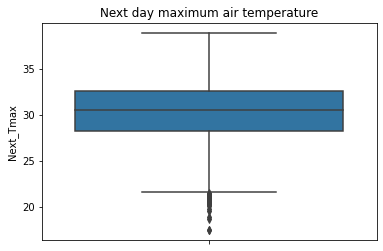

In [20]:
# checking box plot for target variable Next_Tmax.

plt.title('Next day maximum air temperature')
sns.boxplot(y = data['Next_Tmax'])
plt.show()

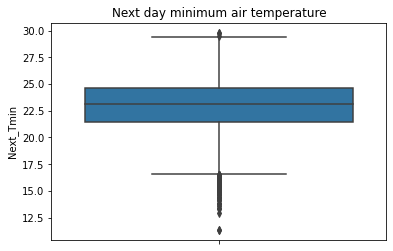

In [21]:
# checking boxplot for target variable Next_Tmin.

plt.title('Next day minimum air temperature')
sns.boxplot(y = data['Next_Tmin'])
plt.show()

- we can see that outliers are present in both of our target variable

<AxesSubplot:xlabel='Solar radiation', ylabel='Count'>

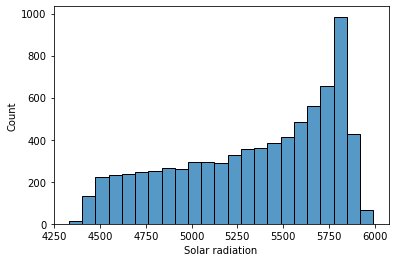

In [22]:
sns.histplot(data['Solar radiation'])

- We could see that the "Solar Radiation always in a a increasing trend, but not the last one"

<AxesSubplot:xlabel='LDAPS_WS', ylabel='LDAPS_LH'>

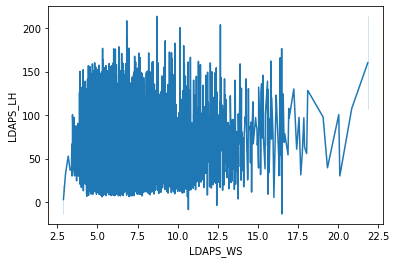

In [23]:
sns.lineplot(x=data['LDAPS_WS'],y=data['LDAPS_LH'])


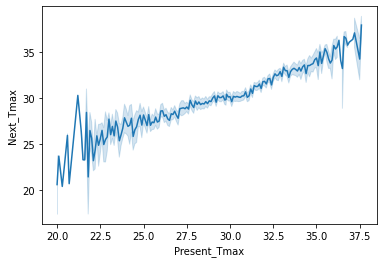

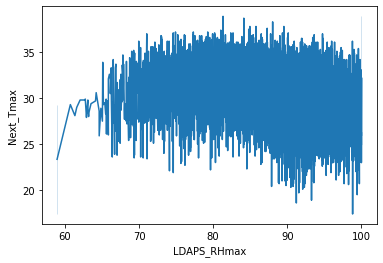

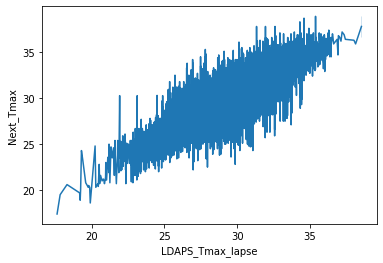

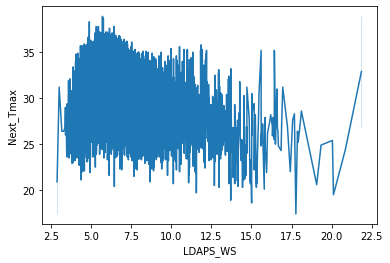

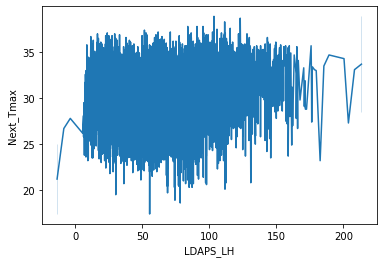

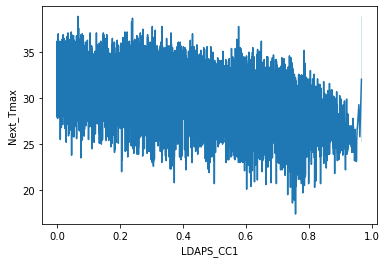

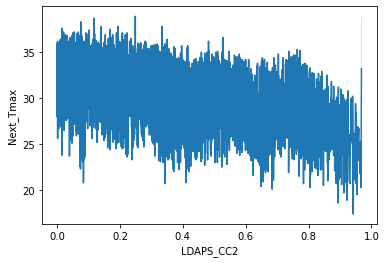

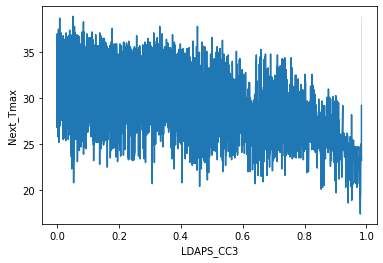

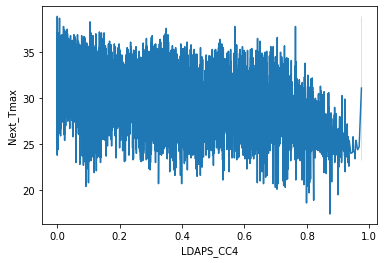

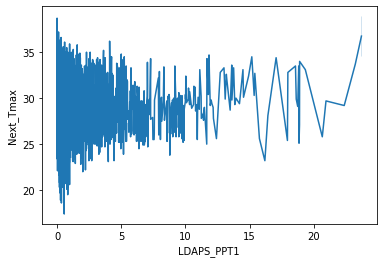

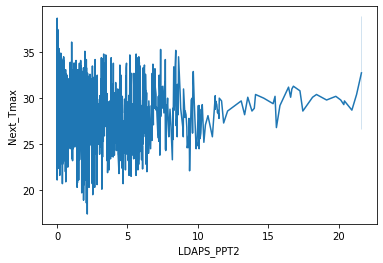

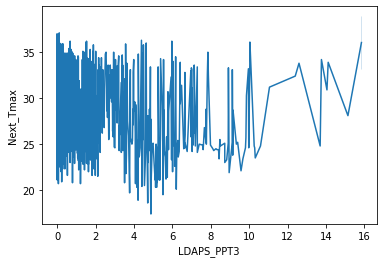

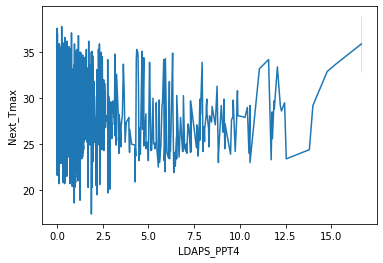

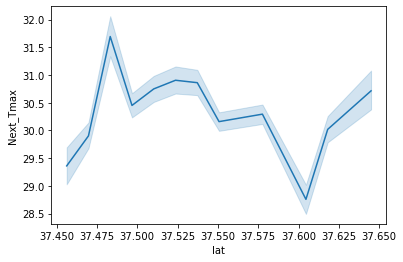

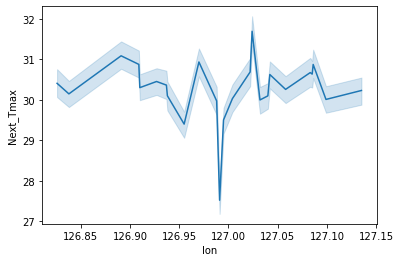

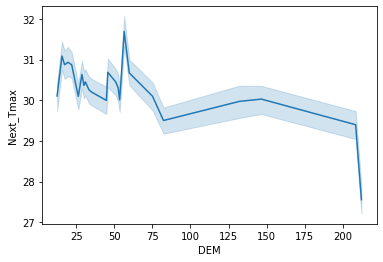

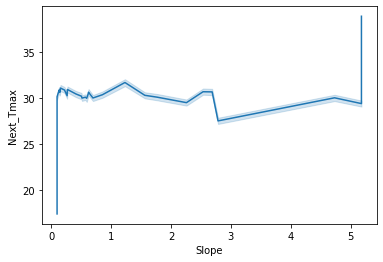

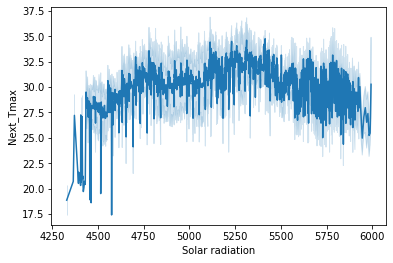

In [31]:
features = ['Present_Tmax', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation']


for i in features:
    sns.lineplot(x=i,y='Next_Tmax',data=data)
    plt.show()

#### Observation:

- Next_Tmax has positive relation with Present_Tmax 
- Increase in Laspe increases the next day temperature
- CC has the negative impact and increase in CC can reduce the nxt day temperature.
- Lat and Lon has no relation with the increase or decrease in temperature.
- temperature decreases with the increase in DEM.

<AxesSubplot:ylabel='Density'>

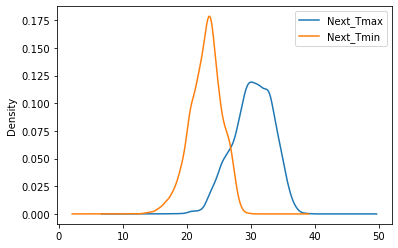

In [19]:

# checking the density of both the target variable.

data[['Next_Tmax', 'Next_Tmin']].plot(kind='density')

- "Next_Tmin" and "Next_Tmax" looks in a flow, "Next_Tmin" is with a good distribution

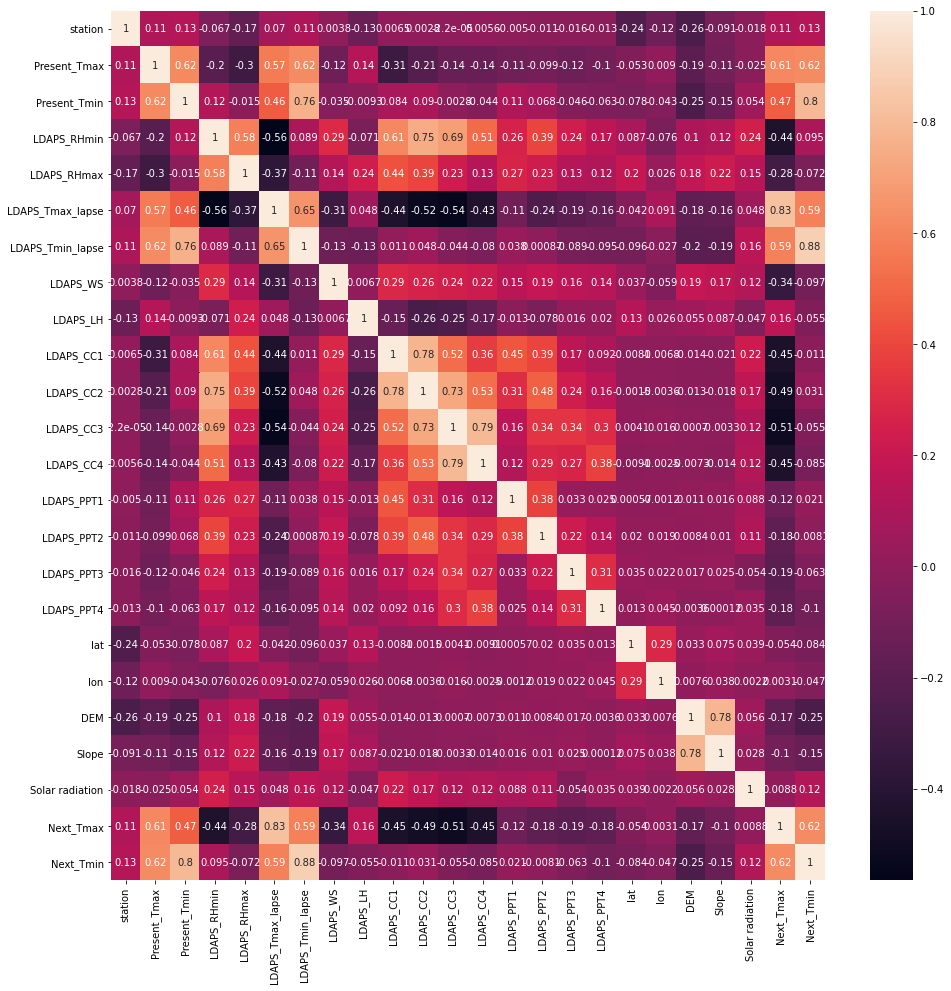

In [25]:
#Use heatmap to check the correlation between features

corr_hmap=data.corr()
plt.figure(figsize=(16,16))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [24]:
data.corr() #the correlation table

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
station           1.000000      0.113118      0.132500    -0.066942   
Present_Tmax      0.113118      1.000000      0.618760    -0.204571   
Present_Tmin      0.132500      0.618760      1.000000     0.123143   
LDAPS_RHmin      -0.066942     -0.204571      0.123143     1.000000   
LDAPS_RHmax      -0.166384     -0.301787     -0.015140     0.579141   
LDAPS_Tmax_lapse  0.069839      0.570129      0.464151    -0.564580   
LDAPS_Tmin_lapse  0.105525      0.623496      0.762993     0.089476   
LDAPS_WS          0.003778     -0.121820     -0.034675     0.294361   
LDAPS_LH         -0.133722      0.135463     -0.009258    -0.070858   
LDAPS_CC1         0.006456     -0.311805      0.084447     0.613818   
LDAPS_CC2         0.002793     -0.213791      0.090263     0.745443   
LDAPS_CC3        -0.000022     -0.144018     -0.002772     0.689679   
LDAPS_CC4         0.005597     -0.140729     -0.044335     0.514075   
LDAPS_PPT1       -0.005034     -0.109006      0.112845     0.262665   
LDAPS_PPT2       -0.010777     -0.099449      0.068176     0.390967   
LDAPS_PPT3       -0.015745     -0.120367     -0.046126     0.240642   
LDAPS_PPT4       -0.013145     -0.099607     -0.062965     0.168595   
lat              -0.237057     -0.052615     -0.078475     0.087099   
lon              -0.118494      0.009020     -0.043461    -0.076237   
DEM              -0.256318     -0.187121     -0.250275     0.102115   
Slope            -0.090789     -0.105809     -0.146339     0.123744   
Solar radiation  -0.018298     -0.025439      0.053578     0.244080   
Next_Tmax         0.108747      0.610348      0.471806    -0.437898   
Next_Tmin         0.129076      0.622741      0.796670     0.095019   

                  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  \
station             -0.166384          0.069839          0.105525  0.003778   
Present_Tmax        -0.301787          0.570129          0.623496 -0.121820   
Present_Tmin        -0.015140          0.464151          0.762993 -0.034675   
LDAPS_RHmin          0.579141         -0.564580          0.089476  0.294361   
LDAPS_RHmax          1.000000         -0.373404         -0.114143  0.135333   
LDAPS_Tmax_lapse    -0.373404          1.000000          0.654021 -0.311996   
LDAPS_Tmin_lapse    -0.114143          0.654021          1.000000 -0.130035   
LDAPS_WS             0.135333         -0.311996         -0.130035  1.000000   
LDAPS_LH             0.238579          0.048010         -0.134761  0.006711   
LDAPS_CC1            0.436652         -0.438439          0.010901  0.289445   
LDAPS_CC2            0.391330         -0.523619          0.047727  0.261090   
LDAPS_CC3            0.226957         -0.541327         -0.044018  0.242991   
LDAPS_CC4            0.130619         -0.429539         -0.080335  0.220533   
LDAPS_PPT1           0.268449         -0.111065          0.038056  0.152587   
LDAPS_PPT2           0.229050         -0.242122          0.000870  0.191886   
LDAPS_PPT3           0.134607         -0.188115         -0.088575  0.161684   
LDAPS_PPT4           0.117853         -0.160273         -0.094655  0.144085   
lat                  0.195798         -0.042093         -0.096257  0.036657   
lon                  0.025667          0.090666         -0.026701 -0.059466   
DEM                  0.177168         -0.178895         -0.195455  0.191053   
Slope                0.219599         -0.162332         -0.185849  0.171629   
Solar radiation      0.149261          0.047971          0.159975  0.121759   
Next_Tmax           -0.283738          0.827189          0.586983 -0.342729   
Next_Tmin           -0.071997          0.586868          0.880176 -0.096576   

                  LDAPS_LH  LDAPS_CC1  ...  LDAPS_PPT2  LDAPS_PPT3  \
station          -0.133722   0.006456  ...   -0.010777   -0.015745   
Present_Tmax      0.135463  -0.311805  ...   -0.099449   -0.120367   
Present_Tmin     -0.009258   0.084447  ...    0.068176   

- there are large correlationsa between features with values 0.89 and we do have some minimum correlation but, we are not  removin any featur based on High Predictions

#### DATA ENGINEERING

In [25]:
data['Date'].unique()  #We have different dates  in our dataset 

array(['30-06-2013', '01-07-2013', '02-07-2013', '03-07-2013',
       '04-07-2013', '05-07-2013', '06-07-2013', '07-07-2013',
       '08-07-2013', '09-07-2013', '10-07-2013', '11-07-2013',
       '12-07-2013', '13-07-2013', '14-07-2013', '15-07-2013',
       '16-07-2013', '17-07-2013', '18-07-2013', '19-07-2013',
       '20-07-2013', '21-07-2013', '22-07-2013', '23-07-2013',
       '24-07-2013', '25-07-2013', '26-07-2013', '27-07-2013',
       '28-07-2013', '29-07-2013', '30-07-2013', '31-07-2013',
       '01-08-2013', '02-08-2013', '03-08-2013', '04-08-2013',
       '05-08-2013', '06-08-2013', '07-08-2013', '08-08-2013',
       '09-08-2013', '10-08-2013', '11-08-2013', '12-08-2013',
       '13-08-2013', '14-08-2013', '15-08-2013', '16-08-2013',
       '17-08-2013', '18-08-2013', '19-08-2013', '20-08-2013',
       '21-08-2013', '22-08-2013', '23-08-2013', '24-08-2013',
       '25-08-2013', '26-08-2013', '27-08-2013', '28-08-2013',
       '29-08-2013', '30-08-2013', '30-06-2014', '01-07

In [9]:
#Extract day,month and year from the Date column

data['Day'] = pd.to_datetime(data.Date, format='%d-%m-%Y').dt.day  
data['Month'] = pd.to_datetime(data.Date, format='%d-%m-%Y').dt.month
data['Year'] = pd.to_datetime(data.Date, format='%d-%m-%Y').dt.year

data = data.drop(columns = 'Date')

In [27]:
data.head(5)

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      2.0          28.7          21.4    58.255688    91.116364   
1      2.0          31.9          21.6    52.263397    90.604721   
2      3.0          31.6          23.3    48.690479    83.973587   
3      4.0          32.0          23.4    58.239788    96.483688   
4      5.0          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  ...  \
0         28.074101         23.006936  6.818887   69.451805   0.233947  ...   
1         29.850689         24.035009  5.691890   51.937448   0.225508  ...   
2         30.091292         24.565633  6.138224   20.573050   0.209344  ...   
3         29.704629         23.326177  5.650050   65.727144   0.216372  ...   
4         29.113934         23.486480  5.735004  107.965535   0.151407  ...   

       lat      lon       DEM   Slope  Solar radiation  Next_Tmax  Next_Tmin  \
0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1       21.2   
1  37.6046  127.032   44.7624  0.5141      5869.312500       30.5       22.5   
2  37.5776  127.058   33.3068  0.2661      5863.555664       31.1       23.9   
3  37.6450  127.022   45.7160  2.5348      5856.964844       31.7       24.3   
4  37.5507  127.135   35.0380  0.5055      5859.552246       31.2       22.5   

   Day  Month  Year  
0   30      6  2013  
1   30      6  2013  
2   30      6  2013  
3   30      6  2013  
4   30      6  2013  

[5 rows x 27 columns]

<AxesSubplot:xlabel='Month', ylabel='count'>

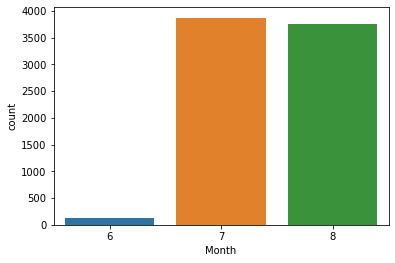

In [28]:
sns.countplot(data.Month)

In [15]:
#Large data has July and August month

We could we have unusual data in our dataset

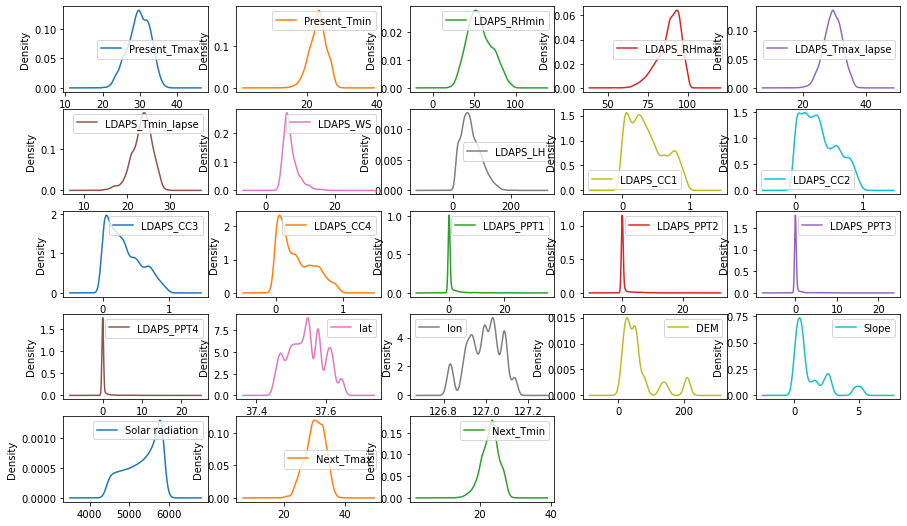

In [12]:
# checking the distribution plot.

data.iloc[:,1:24].plot(kind='density', subplots=True, layout=(6,5), sharex=False, legend=True, figsize=(15,11))
plt.show()

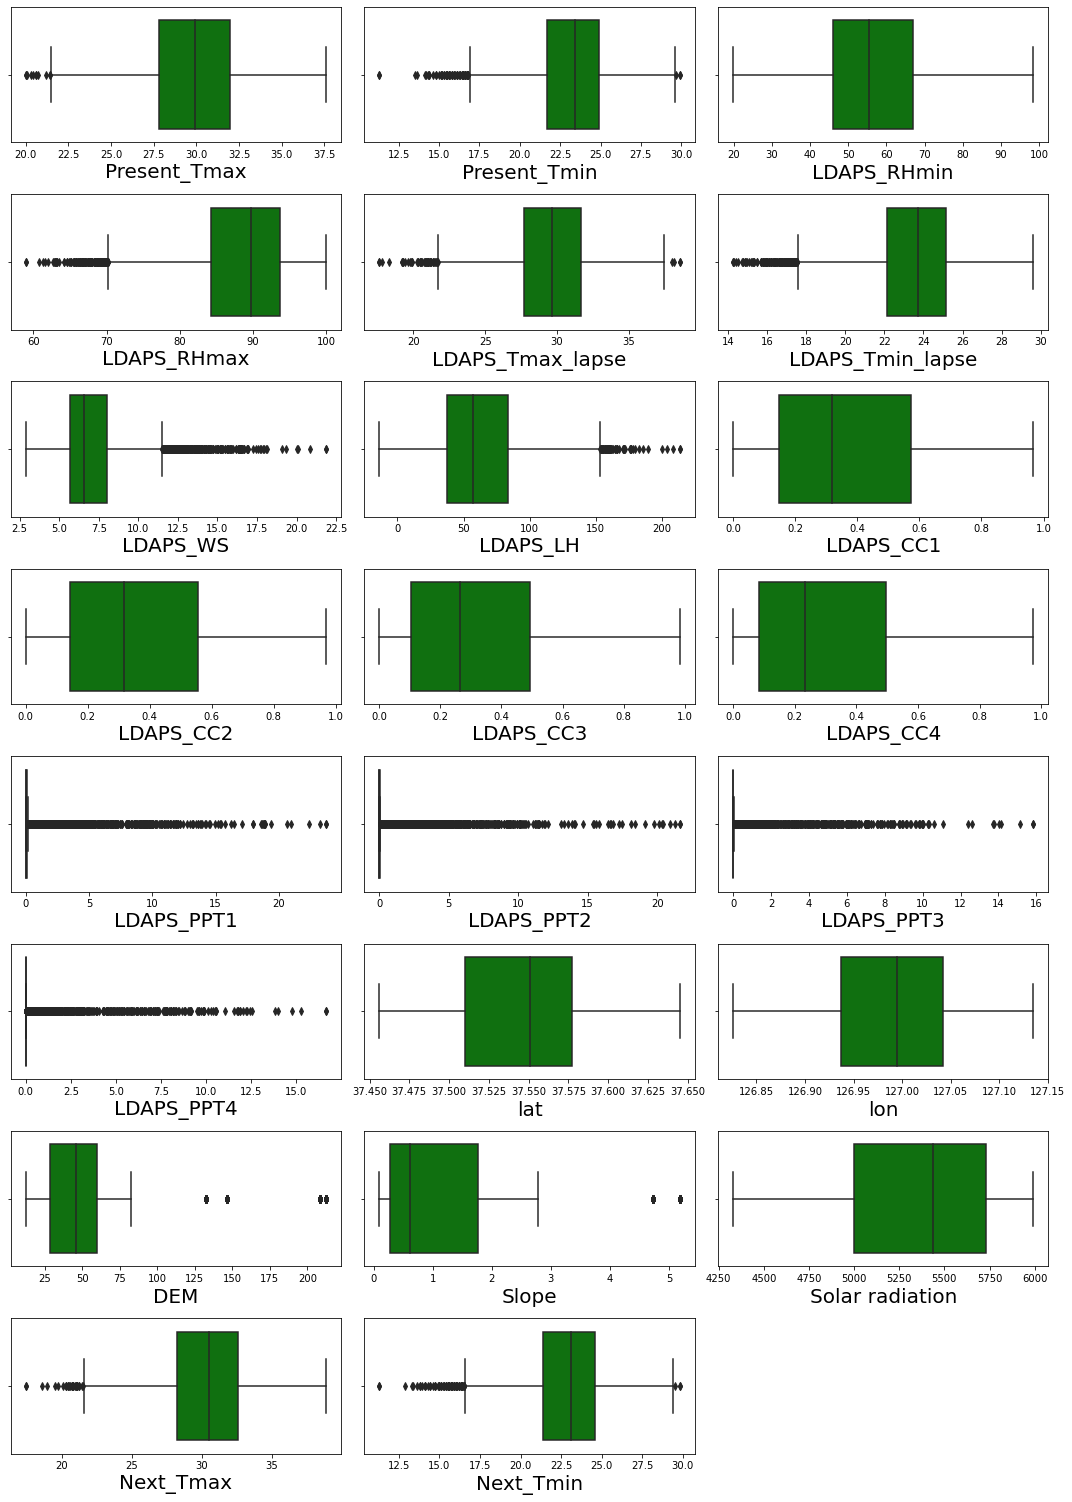

In [13]:
plt.figure(figsize = (15,23))
plotnumber = 1

for column in data.iloc[:,1:24]: #let's visualize only the features columns 
    if plotnumber<=28:
        ax = plt.subplot(9,3,plotnumber)
        sns.boxplot(data[column],color = 'Green')
        plt.xlabel(column,fontsize = 20)
    plotnumber += 1
plt.tight_layout()

- These are the following Data columns with outliers

'Present_Tmax', 'LDAPS_RHmax','LDAPS_Tmax_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_PPT1','LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'DEM', 'Slope'

- Let's remove these outliers by applying some techniques

In [35]:
outliers = ['Present_Tmax', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'DEM', 'Slope']  #Column name with outliers

#### Applying IQR Method

In [36]:
Q1 = data[outliers].quantile(0.25)
Q3 = data[outliers].quantile(0.75)
IQR = Q3-Q1

data_new1 = data[~((data[outliers] < (Q1-1.5*IQR)) | (data[outliers]> (Q3 + 1.5*Q3))).any(axis = 1)]

In [37]:
print('Shape - Before and After:\n')
print('Shape Before'.ljust(20),":",data.shape)
print('Shape After'.ljust(20),":",data_new1.shape)
print('Percentage Loss'.ljust(20),":",((data.shape[0]-data_new1.shape[0])/data.shape[0])*100)

Shape - Before and After:

Shape Before         : (7752, 27)
Shape After          : (3569, 27)
Percentage Loss      : 53.960268317853455


#### Applying z-score Method

In [38]:
from scipy.stats import zscore     #importing zscore from library
z=np.abs(zscore(data[outliers]))
threshold = 3
data_new2 = data[(z<3).all(axis=1)]

In [39]:
print('Shape - Before and After:\n')
print('Shape Before'.ljust(20),":",data.shape)
print('Shape After'.ljust(20),":",data_new2.shape)
print('Percentage Loss'.ljust(20),":",((data.shape[0]-data_new2.shape[0])/data.shape[0])*100)

Shape - Before and After:

Shape Before         : (7752, 27)
Shape After          : (6964, 27)
Percentage Loss      : 10.165118679050568


#### Observation:
    Percentage Loss      : 53.960268317853455 % (IQR)
    Percentage Loss      : 10.165118679050568 % (Z-Score)
- Percentage of data loss is less after applying zscore technique. So, let's proceed with zscore method

In [42]:
data_new = data_new2.copy()  #let's copy our new data in another variaible

### Skewness

Let's check for the skewness in our dataset

In [41]:
data_new.skew()  #Let's check the skewness

station             0.001346
Present_Tmax       -0.288484
Present_Tmin       -0.363434
LDAPS_RHmin         0.308275
LDAPS_RHmax        -0.682616
LDAPS_Tmax_lapse   -0.153285
LDAPS_Tmin_lapse   -0.530116
LDAPS_WS            1.082007
LDAPS_LH            0.564078
LDAPS_CC1           0.588273
LDAPS_CC2           0.497791
LDAPS_CC3           0.695602
LDAPS_CC4           0.716519
LDAPS_PPT1          3.752587
LDAPS_PPT2          4.870646
LDAPS_PPT3          5.503952
LDAPS_PPT4          5.930606
lat                 0.102096
lon                -0.276838
DEM                 1.752860
Slope               1.587386
Solar radiation    -0.498516
Next_Tmax          -0.285452
Next_Tmin          -0.407851
Day                -0.009988
Month              -0.206052
Year               -0.002040
dtype: float64

We have skewness in 
"LDAPS_RHmax","LDAPS_Tmax_lapse","LDAPS_WS","LDAPS_LH","LDAPS_CC1","LDAPS_CC3","LDAPS_CC4","LDAPS_PPT1",
"LDAPS_PPT2","LDAPS_PPT3","LDAPS_PPT4","DEM","Slope"

##### Let's apply PowerTransformation to remove/reduce these skewness

In [43]:

from sklearn.preprocessing import PowerTransformer #importing the library

scaler = PowerTransformer(method='yeo-johnson')
    
data_new['LDAPS_RHmax'] = scaler.fit_transform(data_new['LDAPS_RHmax'].values.reshape(-1,1))
data_new['LDAPS_Tmax_lapse'] = scaler.fit_transform(data_new['LDAPS_Tmax_lapse'].values.reshape(-1,1))
data_new['LDAPS_WS'] = scaler.fit_transform(data_new['LDAPS_WS'].values.reshape(-1,1))
data_new['LDAPS_LH'] = scaler.fit_transform(data_new['LDAPS_LH'].values.reshape(-1,1))

data_new['LDAPS_CC1'] = scaler.fit_transform(data_new['LDAPS_CC1'].values.reshape(-1,1))
data_new['LDAPS_CC3'] = scaler.fit_transform(data_new['LDAPS_CC3'].values.reshape(-1,1))
data_new['LDAPS_CC4'] = scaler.fit_transform(data_new['LDAPS_CC4'].values.reshape(-1,1))

data_new['LDAPS_PPT1'] = scaler.fit_transform(data_new['LDAPS_PPT1'].values.reshape(-1,1))
data_new['LDAPS_PPT2'] = scaler.fit_transform(data_new['LDAPS_PPT2'].values.reshape(-1,1))
data_new['LDAPS_PPT3'] = scaler.fit_transform(data_new['LDAPS_PPT3'].values.reshape(-1,1))
data_new['LDAPS_PPT4'] = scaler.fit_transform(data_new['LDAPS_PPT4'].values.reshape(-1,1))

data_new['DEM'] = scaler.fit_transform(data_new['DEM'].values.reshape(-1,1))
data_new['Slope'] = scaler.fit_transform(data_new['Slope'].values.reshape(-1,1))


In [44]:
data_new.skew()  #To check whether the skewness has been removed/reduced

station             0.001346
Present_Tmax       -0.288484
Present_Tmin       -0.363434
LDAPS_RHmin         0.308275
LDAPS_RHmax        -0.099097
LDAPS_Tmax_lapse   -0.011060
LDAPS_Tmin_lapse   -0.530116
LDAPS_WS            0.006775
LDAPS_LH           -0.030671
LDAPS_CC1           0.061999
LDAPS_CC2           0.497791
LDAPS_CC3           0.089818
LDAPS_CC4           0.139431
LDAPS_PPT1          1.553763
LDAPS_PPT2          1.748694
LDAPS_PPT3          1.905534
LDAPS_PPT4          2.155656
lat                 0.102096
lon                -0.276838
DEM                 0.038358
Slope               0.232917
Solar radiation    -0.498516
Next_Tmax          -0.285452
Next_Tmin          -0.407851
Day                -0.009988
Month              -0.206052
Year               -0.002040
dtype: float64

We could find that most of the skewness has been removed. Here, we are still left with some skewness in the columns "LDAPS_PPT1",
"LDAPS_PPT2","LDAPS_PPT3","LDAPS_PPT4", bust as we already that these were the columns that contained "0 value data in many rows" so it would be hard to remove the skewness

So, let's proceed further

In [45]:
data_new  #display the new dataset 

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0         2.0          28.7          21.4    58.255688     0.354872   
1         2.0          31.9          21.6    52.263397     0.267276   
2         3.0          31.6          23.3    48.690479    -0.717589   
3         4.0          32.0          23.4    58.239788     1.386765   
4         5.0          31.4          21.9    56.174095     0.191760   
...       ...           ...           ...          ...          ...   
7745     21.0          23.1          17.8    24.688997    -1.369013   
7746     22.0          22.5          17.4    30.094858    -0.753922   
7747     23.0          23.3          17.1    26.741310    -1.307275   
7748     24.0          23.3          17.7    24.040634    -1.463584   
7749     25.0          23.2          17.4    22.933014    -1.468480   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  ...  \
0            -0.650793         23.006936  0.169963  0.343004  -0.314946  ...   
1            -0.019540         24.035009 -0.580096 -0.176754  -0.356185  ...   
2             0.067605         24.565633 -0.258437 -1.391748  -0.436763  ...   
3            -0.072250         23.326177 -0.612167  0.238283  -0.401468  ...   
4            -0.283944         23.486480 -0.547411  1.298314  -0.743930  ...   
...                ...               ...       ...       ...        ...  ...   
7745         -0.741840         18.303014  0.041476 -2.025660  -1.342790  ...   
7746         -1.122378         17.814038 -0.522579  0.681035  -1.253871  ...   
7747         -1.241758         18.775678 -0.251160  0.414689  -1.497997  ...   
7748         -1.018369         18.733519  0.004322 -0.329935  -1.457719  ...   
7749         -0.697729         18.522965  0.429942 -2.062704  -1.369112  ...   

          lat      lon       DEM     Slope  Solar radiation  Next_Tmax  \
0     37.6046  126.991  1.849668  1.324600      5992.895996       29.1   
1     37.6046  127.032  0.062333 -0.379843      5869.312500       30.5   
2     37.5776  127.058 -0.360338 -0.947448      5863.555664       31.1   
3     37.6450  127.022  0.091377  1.245787      5856.964844       31.7   
4     37.5507  127.135 -0.285828 -0.396335      5859.552246       31.2   
...       ...      ...       ...       ...              ...        ...   
7745  37.5507  127.040 -0.719145 -0.273423      4456.024414       27.6   
7746  37.5102  127.086 -1.005085 -1.356273      4441.803711       28.0   
7747  37.5372  126.891 -1.580254 -1.281300      4443.313965       28.3   
7748  37.5237  126.909 -1.401807 -1.072163      4438.373535       28.6   
7749  37.5237  126.970 -1.193194 -0.933224      4451.345215       27.8   

      Next_Tmin  Day  Month  Year  
0          21.2   30      6  2013  
1          22.5   30      6  2013  
2          23.9   30      6  2013  
3          24.3   30      6  2013  
4          22.5   30      6  2013  
...         ...  ...    ...   ...  
7745       17.7   30      8  2017  
7746       17.1   30      8  2017  
7747       18.1   30      8  2017  
7748       18.8   30      8  2017  
7749       17.4   30      8  2017  

[6964 rows x 27 columns]

### Splitting features and labels

In [47]:
X =data_new.drop(columns = ['Next_Tmax','Next_Tmin'])  #features

Y_max=data_new['Next_Tmax']  #Target column 1 "Next_Tmax"
Y_min=data_new['Next_Tmin']  #Target column 2 "Next_Tmin"


### Scaling the data

Let's apply StandardScaler method to scale the data

In [48]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()

X_scaled = Scaler.fit_transform(X)

---------------

## Target Column: "Next_Tmax" (Y_max)

#### Finding the Best Random State

In [50]:
from sklearn.linear_model import LinearRegression

maxR2_Score = 0
maxRS = 0

for i in range(200):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y_max,test_size = 0.20,random_state = i)
    LR = LinearRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    Score = r2_score(y_test,predrf)
    if Score>maxR2_Score:
        maxR2_Score = Score
        maxRS = i
        
print('The best accuracy is ',maxR2_Score, ' with Random State ',maxRS)

The best accuracy is  0.784183744313242  with Random State  128


### Splitting Training and Testing data

In [51]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled, Y_max, test_size =0.20, random_state = maxRS)


# Model Building

In [52]:
#Importing all required Libraries that will be used for building a model

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


LinearRegression()
R Squared (R2):  78.4183744313242
Mean Squared Error (MSE):  1.8992716546404373
Root Mean Squared Error (RMSE):  1.3781406512545944
Mean Absolute Error (MAE):  1.0470409812560433


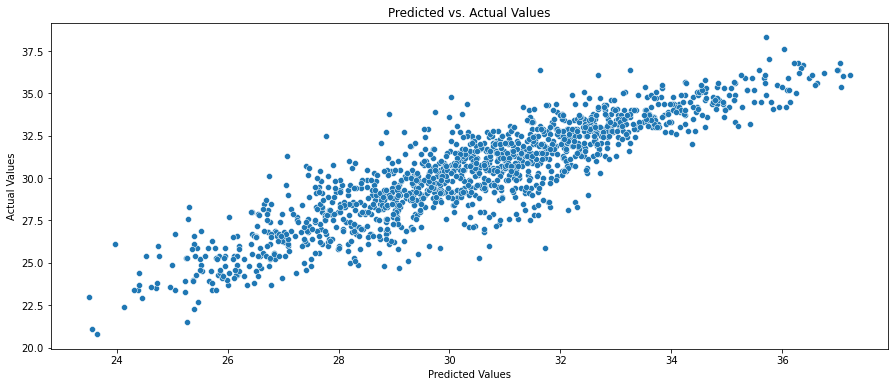

------------------------------------------------------------------------------------------------------------------------
RandomForestRegressor()
R Squared (R2):  90.87931276109732
Mean Squared Error (MSE):  0.802657922526059
Root Mean Squared Error (RMSE):  0.8959117827811279
Mean Absolute Error (MAE):  0.6691377297955332


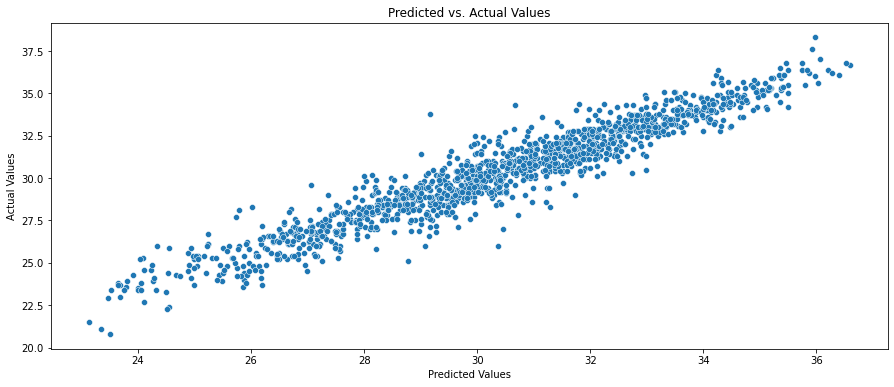

------------------------------------------------------------------------------------------------------------------------
KNeighborsRegressor()
R Squared (R2):  88.04111711056731
Mean Squared Error (MSE):  1.0524307921471214
Root Mean Squared Error (RMSE):  1.0258804960360253
Mean Absolute Error (MAE):  0.766163038958082


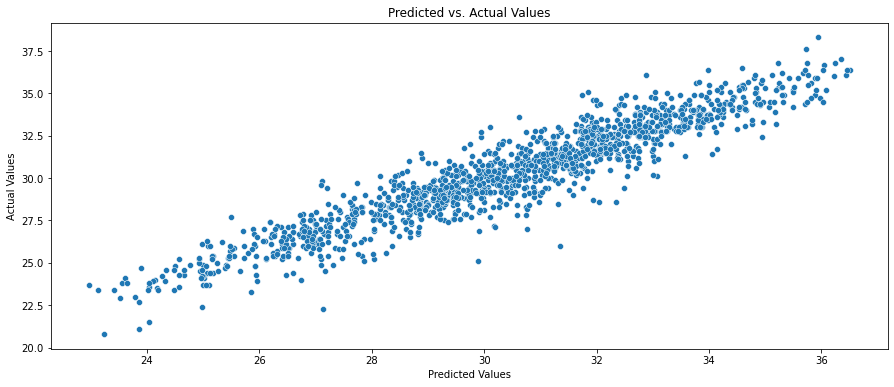

------------------------------------------------------------------------------------------------------------------------
GradientBoostingRegressor()
R Squared (R2):  86.20196319208478
Mean Squared Error (MSE):  1.2142838877250879
Root Mean Squared Error (RMSE):  1.1019455012499884
Mean Absolute Error (MAE):  0.8483031270537272


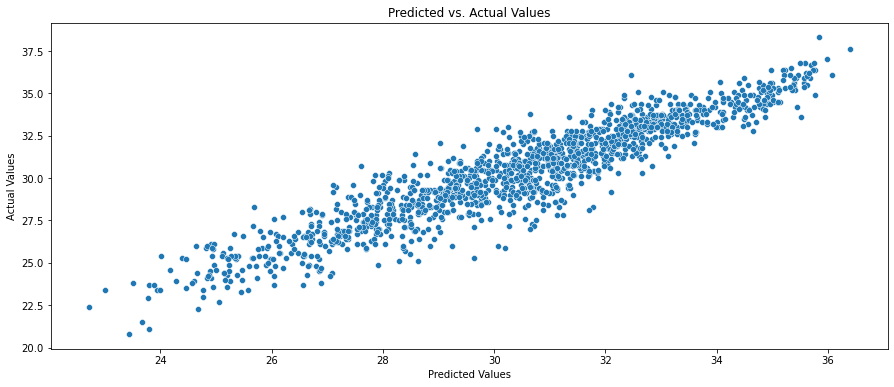

------------------------------------------------------------------------------------------------------------------------
Lasso()
R Squared (R2):  56.34464989491493
Mean Squared Error (MSE):  3.84185003878185
Root Mean Squared Error (RMSE):  1.9600637843656645
Mean Absolute Error (MAE):  1.567881167337978


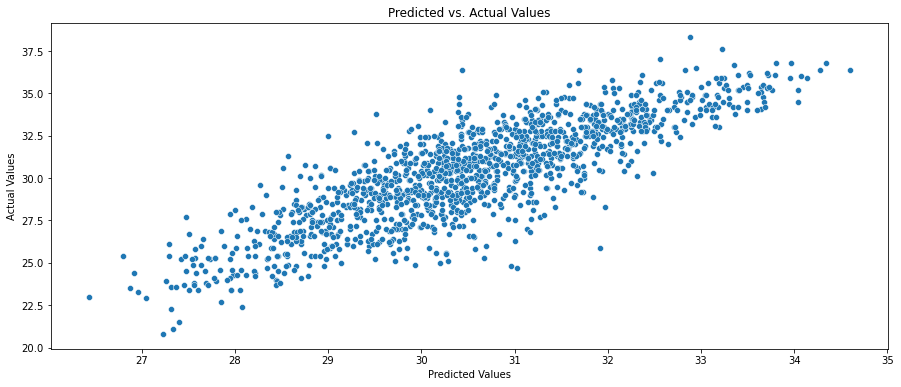

------------------------------------------------------------------------------------------------------------------------
Ridge()
R Squared (R2):  78.42127590208798
Mean Squared Error (MSE):  1.8990163133010698
Root Mean Squared Error (RMSE):  1.3780480083440743
Mean Absolute Error (MAE):  1.0469059951886404


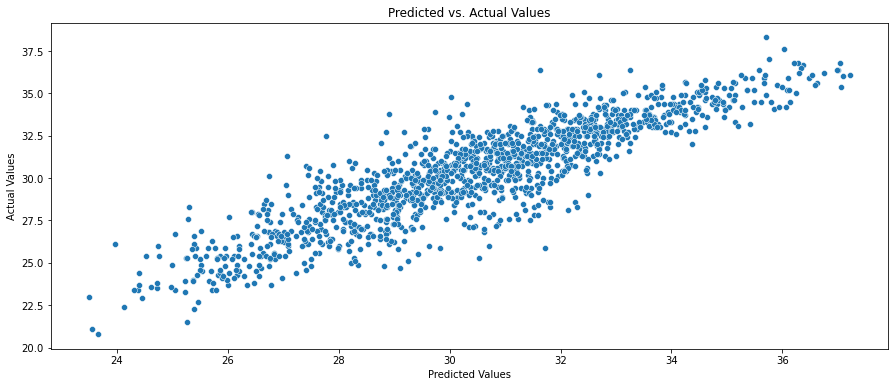

------------------------------------------------------------------------------------------------------------------------


In [136]:
lr=LinearRegression()
rf=RandomForestRegressor()
kn=KNeighborsRegressor()
gb=GradientBoostingRegressor()
ls=Lasso()
rd=Ridge()

model=[lr,rf,kn,gb,ls,rd]
kf = KFold(n_splits=5, random_state=54, shuffle=True)

train=[]
test=[]
cv=[]

for m in model:
    m = m.fit(x_train,y_train)
    pred_train=m.predict(x_train)
    pred_test=m.predict(x_test)
    train_score=r2_score(y_train,pred_train)
    train.append(train_score*100)
    test_score=r2_score(y_test,pred_test)
    test.append(test_score*100)
    print(m)
    print('R Squared (R2): ',test_score*100)
    print('Mean Squared Error (MSE): ',mean_squared_error(y_test,pred_test))
    print('Root Mean Squared Error (RMSE): ',np.sqrt(mean_squared_error(y_test, pred_test)))
    print('Mean Absolute Error (MAE): ',mean_absolute_error(y_test,pred_test))
    score=cross_val_score(m,X_scaled,Y_max,cv=kf)
    cv.append(score.mean()*100)
    plt.figure(figsize=[15,6])
    sns.scatterplot(x=pred_test, y=y_test)
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title('Predicted vs. Actual Values')
    plt.show()
    print('-'*120)
    
    
    
    
Overall_score={'Model':['Linear Regression','RandomForest','KNN','GradientBoosting','Lasso','Ridge'],
             'Training Score':train,
            'Test Score':test,
            'Cross Validation Score': cv}
Overall_score=pd.DataFrame(data=Overall_score)


###### Let's check for our Overall scores of our models:

In [137]:
Overall_score

Model  Training Score  Test Score  Cross Validation Score
0  Linear Regression       74.418489   78.418374               75.025055
1       RandomForest       98.544493   90.879313               89.803090
2                KNN       91.172593   88.041117               86.849904
3   GradientBoosting       86.869900   86.201963               84.632891
4              Lasso       53.626256   56.344650               54.402303
5              Ridge       74.418410   78.421276               75.024966

In [138]:
#Let's get a new column, that shows the difference between Prediction Test R2 Score and Cross Validation Score

Overall_score['Difference'] = Overall_score['Test Score'] - Overall_score['Cross Validation Score']

In [140]:
Overall_score  #display the table

Model  Training Score  Test Score  Cross Validation Score  \
0  Linear Regression       74.418489   78.418374               75.025055   
1       RandomForest       98.544493   90.879313               89.803090   
2                KNN       91.172593   88.041117               86.849904   
3   GradientBoosting       86.869900   86.201963               84.632891   
4              Lasso       53.626256   56.344650               54.402303   
5              Ridge       74.418410   78.421276               75.024966   

   Difference  
0    3.393320  
1    1.076223  
2    1.191213  
3    1.569072  
4    1.942347  
5    3.396310

In [141]:
Overall_score['Difference'].min()  #Find the value with least difference in "Difference Column"

1.0762229485022345

In [142]:
#Let's check the row that has the least difference value in "Difference Column"

Overall_score[Overall_score['Difference']==1.0762229485022345]   

Model  Training Score  Test Score  Cross Validation Score  \
1  RandomForest       98.544493   90.879313                89.80309   

   Difference  
1    1.076223

    "Random Forest Regressor" model comes up with "high R2_score" and with least difference between the R2 Score and          the Cross validation score

### "Random Forest Regressor" is our best model for "Maximum Temperature Prediction"

Let's Hyper tune our model to increase the accuracy score

### Hyper Tuning

In [59]:
from sklearn.model_selection import RandomizedSearchCV

#RandomizedSearchCV


# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,15,100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [60]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [61]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations

Rand_final = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', 
                                n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [62]:
Rand_final.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=754; total time=  11.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=754; total time=  11.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=754; total time=  12.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=754; total time=  15.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=754; total time=  12.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=918; total time=  18.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=918; total time=  20.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 181, 263, 345,
                                                         427, 509, 590, 672,
                                                         754, 836, 918, 1000]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [63]:
print( Rand_final.best_params_)  #Let's ccheck best parameters

{'n_estimators': 836, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 25}


In [64]:
predictions_Tmax = Rand_final.predict(x_test)  #Let's predict the test data

### Saving the model for future use

In [65]:
import joblib

joblib.dump(Rand_final,'Tmax_Predictions.obj')

['Tmax_Predictions.obj']

### Performance Metrix

In [66]:
print('R Squared (R2): ',r2_score(y_test,predictions_Tmax))
print('Mean Squared Error (MSE): ',mean_squared_error(y_test,predictions_Tmax))
print('Root Mean Squared Error (RMSE): ',np.sqrt(mean_squared_error(y_test, predictions_Tmax)))
print('Mean Absolute Error (MAE): ',mean_absolute_error(y_test,predictions_Tmax))


R Squared (R2):  0.9215003832133829
Mean Squared Error (MSE):  0.6908288561884568
Root Mean Squared Error (RMSE):  0.8311611493497857
Mean Absolute Error (MAE):  0.627332151083082


Our model score increased by 1.2 %

### Our model is now ready to predict the "Next_Tmax" value that displays the Nest Day Maximum Temperature

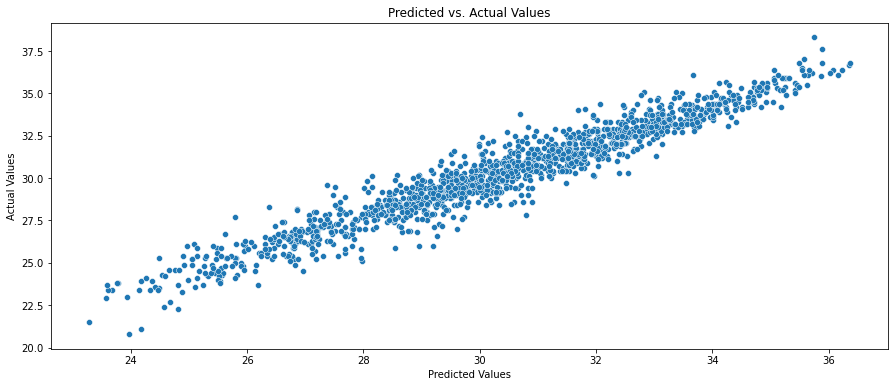

In [67]:
#plot predicted vs. actual values

plt.figure(figsize=[15,6])
sns.scatterplot(x=predictions_Tmax, y=y_test)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Predicted vs. Actual Values')
plt.show()

Our Graph also indicates that most of the data predicted are quite closer to actual data

### Loading Model to predict the data

In [94]:
#Load the saved model
import joblib

loaded_model = joblib.load(open('Tmax_Predictions.obj','rb'))

In [97]:
# Predict the Labels using the reloaded Model

Predictions_t_max = loaded_model.predict(x_test)


pd.set_option ('display.max_rows', None)

Predictions_tmax = pd.DataFrame(Predictions_t_max,columns = ['Predicted_tmax'])
Predictions_tmax

Predicted_tmax
0          28.962919
1          30.425828
2          31.711076
3          25.566716
4          29.789759
5          31.526684
6          29.946202
7          27.513695
8          34.323325
9          28.527200
10         31.309126
11         33.138270
12         28.326081
13         28.843958
14         32.373814
15         30.648235
16         29.893147
17         28.955459
18         26.862469
19         30.085686
20         35.428349
21         32.475718
22         29.511447
23         31.662740
24         29.511960
25         32.035975
26         30.248804
27         32.260097
28         32.199472
29         31.054258
30         32.908293
31         29.857175
32         27.147308
33         29.938889
34         30.527020
35         33.731070
36         32.741148
37         31.666719
38         30.457107
39         31.237505
40         29.967434
41         29.530484
42         27.592464
43         30.190528
44         29.418537
45         30.427342
46         25.399402
47         28.473320
48         32.867298
49         27.831848
50         29.743997
51         34.006708
52         28.662051
53         27.954426
54         32.493032
55         30.512095
56         27.105024
57         29.917188
58         28.541695
59         25.458492
60         26.794569
61         30.730353
62         29.607506
63         36.344378
64         33.140251
65         32.604434
66         33.667120
67         32.469903
68         26.562769
69         28.033181
70         24.486094
71         29.322368
72         33.233491
73         25.791118
74         32.455567
75         33.772318
76         30.774520
77         28.381100
78         32.353531
79         34.075864
80         28.521658
81         28.582267
82         28.605024
83         31.044253
84         32.062889
85         25.303349
86         29.296740
87         27.645753
88         28.486962
89         31.137321
90         28.070185
91         30.204930
92         27.165012
93         33.288527
94         28.430385
95         28.961585
96         27.969431
97         31.801886
98         30.142958
99         33.135610
100        24.976675
101        27.839952
102        28.361801
103        30.644498
104        28.615250
105        33.703623
106        31.585018
107        35.038995
108        29.554495
109        27.737410
110        30.214414
111        32.952941
112        30.516805
113        25.969348
114        28.150029
115        33.410149
116        33.287031
117        25.478858
118        31.842308
119        30.504743
120        25.921648
121        33.651726
122        35.252592
123        31.787884
124        27.363365
125        31.579350
126        31.791118
127        31.255302
128        26.968061
129        31.170995
130        30.265237
131        23.272129
132        29.348840
133        30.619710
134        33.174282
135        30.042129
136        31.210570
137        25.584838
138        32.603079
139        24.405861
140        29.190505
141        29.563128
142        33.446053
143        27.444677
144        32.586779
145        34.652301
146        31.286471
147        29.341365
148        29.607416
149        30.332152
150        30.886782
151        27.775390
152        34.946751
153        32.643032
154        28.976166
155        32.442282
156        33.061520
157        32.433808
158        30.741806
159        31.251166
160        27.435048
161        30.475870
162        30.511393
163        31.441642
164        29.098583
165        33.316778
166        27.927248
167        34.397368
168        34.670692
169        24.466684
170        26.810855
171        27.246081
172        32.526913
173        31.172718
174        33.051469
175        29.754404
176        31.508418
177        29.367476
178        29.281062
179        33.107006
180        30.818753
181        29.674874
182        28.779396
183        30.366312
184        29.092823
185        25.087919
186        31.799891
187        33.256232
188        29.744586
189        32.60

In [69]:

# Predict the Labels using the reloaded Model
Predictions_t_max = loaded_model.predict(x_test)


pd.set_option ('display.max_rows', None)

Predictions_tmax = pd.DataFrame(Predictions_t_max,columns = ['Predicted_tmax'])
Predictions_tmax

Predicted_tmax
0          28.962919
1          30.425828
2          31.711076
3          25.566716
4          29.789759
5          31.526684
6          29.946202
7          27.513695
8          34.323325
9          28.527200
10         31.309126
11         33.138270
12         28.326081
13         28.843958
14         32.373814
15         30.648235
16         29.893147
17         28.955459
18         26.862469
19         30.085686
20         35.428349
21         32.475718
22         29.511447
23         31.662740
24         29.511960
25         32.035975
26         30.248804
27         32.260097
28         32.199472
29         31.054258
30         32.908293
31         29.857175
32         27.147308
33         29.938889
34         30.527020
35         33.731070
36         32.741148
37         31.666719
38         30.457107
39         31.237505
40         29.967434
41         29.530484
42         27.592464
43         30.190528
44         29.418537
45         30.427342
46         25.399402
47         28.473320
48         32.867298
49         27.831848
50         29.743997
51         34.006708
52         28.662051
53         27.954426
54         32.493032
55         30.512095
56         27.105024
57         29.917188
58         28.541695
59         25.458492
60         26.794569
61         30.730353
62         29.607506
63         36.344378
64         33.140251
65         32.604434
66         33.667120
67         32.469903
68         26.562769
69         28.033181
70         24.486094
71         29.322368
72         33.233491
73         25.791118
74         32.455567
75         33.772318
76         30.774520
77         28.381100
78         32.353531
79         34.075864
80         28.521658
81         28.582267
82         28.605024
83         31.044253
84         32.062889
85         25.303349
86         29.296740
87         27.645753
88         28.486962
89         31.137321
90         28.070185
91         30.204930
92         27.165012
93         33.288527
94         28.430385
95         28.961585
96         27.969431
97         31.801886
98         30.142958
99         33.135610
100        24.976675
101        27.839952
102        28.361801
103        30.644498
104        28.615250
105        33.703623
106        31.585018
107        35.038995
108        29.554495
109        27.737410
110        30.214414
111        32.952941
112        30.516805
113        25.969348
114        28.150029
115        33.410149
116        33.287031
117        25.478858
118        31.842308
119        30.504743
120        25.921648
121        33.651726
122        35.252592
123        31.787884
124        27.363365
125        31.579350
126        31.791118
127        31.255302
128        26.968061
129        31.170995
130        30.265237
131        23.272129
132        29.348840
133        30.619710
134        33.174282
135        30.042129
136        31.210570
137        25.584838
138        32.603079
139        24.405861
140        29.190505
141        29.563128
142        33.446053
143        27.444677
144        32.586779
145        34.652301
146        31.286471
147        29.341365
148        29.607416
149        30.332152
150        30.886782
151        27.775390
152        34.946751
153        32.643032
154        28.976166
155        32.442282
156        33.061520
157        32.433808
158        30.741806
159        31.251166
160        27.435048
161        30.475870
162        30.511393
163        31.441642
164        29.098583
165        33.316778
166        27.927248
167        34.397368
168        34.670692
169        24.466684
170        26.810855
171        27.246081
172        32.526913
173        31.172718
174        33.051469
175        29.754404
176        31.508418
177        29.367476
178        29.281062
179        33.107006
180        30.818753
181        29.674874
182        28.779396
183        30.366312
184        29.092823
185        25.087919
186        31.799891
187        33.256232
188        29.744586
189        32.60

In [70]:
#create dataframe of actual and predicted values

list_of_tuples = list(zip(y_test, Predictions_t_max))
Maximum_Temperature = pd.DataFrame(list_of_tuples, columns = ['Actual', 'Predicted'])

In [71]:
Maximum_Temperature

Actual  Predicted
0     26.000000  28.962919
1     30.900000  30.425828
2     31.100000  31.711076
3     24.300000  25.566716
4     29.800000  29.789759
5     32.300000  31.526684
6     29.400000  29.946202
7     26.900000  27.513695
8     33.600000  34.323325
9     29.100000  28.527200
10    31.900000  31.309126
11    32.000000  33.138270
12    27.900000  28.326081
13    28.900000  28.843958
14    32.800000  32.373814
15    31.600000  30.648235
16    29.300000  29.893147
17    28.300000  28.955459
18    28.200000  26.862469
19    30.900000  30.085686
20    35.600000  35.428349
21    32.600000  32.475718
22    28.800000  29.511447
23    31.300000  31.662740
24    29.700000  29.511960
25    32.800000  32.035975
26    30.000000  30.248804
27    32.500000  32.260097
28    32.700000  32.199472
29    30.200000  31.054258
30    33.200000  32.908293
31    29.600000  29.857175
32    28.000000  27.147308
33    29.800000  29.938889
34    30.900000  30.527020
35    34.600000  33.731070
36    32.900000  32.741148
37    30.900000  31.666719
38    29.600000  30.457107
39    31.300000  31.237505
40    29.400000  29.967434
41    30.900000  29.530484
42    28.200000  27.592464
43    29.100000  30.190528
44    29.000000  29.418537
45    31.200000  30.427342
46    24.900000  25.399402
47    28.800000  28.473320
48    32.800000  32.867298
49    26.400000  27.831848
50    29.700000  29.743997
51    33.400000  34.006708
52    28.300000  28.662051
53    27.700000  27.954426
54    32.500000  32.493032
55    31.000000  30.512095
56    27.300000  27.105024
57    30.200000  29.917188
58    25.900000  28.541695
59    25.200000  25.458492
60    26.400000  26.794569
61    30.800000  30.730353
62    29.100000  29.607506
63    36.700000  36.344378
64    32.600000  33.140251
65    32.800000  32.604434
66    33.800000  33.667120
67    32.400000  32.469903
68    26.700000  26.562769
69    27.700000  28.033181
70    23.500000  24.486094
71    30.800000  29.322368
72    33.300000  33.233491
73    27.700000  25.791118
74    32.800000  32.455567
75    33.300000  33.772318
76    30.000000  30.774520
77    27.900000  28.381100
78    31.000000  32.353531
79    34.200000  34.075864
80    27.400000  28.521658
81    30.200000  28.582267
82    28.600000  28.605024
83    31.400000  31.044253
84    31.400000  32.062889
85    24.300000  25.303349
86    27.300000  29.296740
87    28.000000  27.645753
88    27.800000  28.486962
89    32.500000  31.137321
90    28.000000  28.070185
91    30.300000  30.204930
92    27.100000  27.165012
93    34.400000  33.288527
94    28.300000  28.430385
95    30.200000  28.961585
96    25.100000  27.969431
97    33.100000  31.801886
98    32.100000  30.142958
99    33.100000  33.135610
100   24.000000  24.976675
101   27.100000  27.839952
102   27.800000  28.361801
103   30.600000  30.644498
104   28.300000  28.615250
105   33.000000  33.703623
106   31.000000  31.585018
107   34.500000  35.038995
108   29.300000  29.554495
109   26.600000  27.737410
110   30.500000  30.214414
111   33.200000  32.952941
112   29.500000  30.516805
113   26.000000  25.969348
114   28.300000  28.150029
115   33.000000  33.410149
116   33.400000  33.287031
117   25.900000  25.478858
118   32.000000  31.842308
119   31.300000  30.504743
120   24.800000  25.921648
121   34.300000  33.651726
122   35.400000  35.252592
123   31.300000  31.787884
124   27.400000  27.363365
125   31.400000  31.579350
126   31.900000  31.791118
127   31.000000  31.255302
128   24.500000  26.968061
129   30.400000  31.170995
130   30.500000  30.265237
131   21.500000  23.272129
132   28.400000  29.348840
133   30.000000  30.619710
134   33.400000  33.174282
135   30.300000  30.042129
136   31.600000  31.210570
137   24.400000  25.584838
138   33.900000  32.603079
139   23.600000  24.405861
140   30.300000  29.190505
141   28.400000  29.563128
142   33.500000  33.446053
143   26.900000  27.444677
144   33.600000  32.586779
145   34.500000  34.652301
146   31.800000  31.286471
147   31.0000

In [98]:
#create dataframe of actual and predicted values

list_of_tuples = list(zip(y_test, Predictions_t_max))
Maximum_Temperature = pd.DataFrame(list_of_tuples, columns = ['Actual', 'Predicted'])

In [99]:
Maximum_Temperature

Actual  Predicted
0     26.000000  28.962919
1     30.900000  30.425828
2     31.100000  31.711076
3     24.300000  25.566716
4     29.800000  29.789759
5     32.300000  31.526684
6     29.400000  29.946202
7     26.900000  27.513695
8     33.600000  34.323325
9     29.100000  28.527200
10    31.900000  31.309126
11    32.000000  33.138270
12    27.900000  28.326081
13    28.900000  28.843958
14    32.800000  32.373814
15    31.600000  30.648235
16    29.300000  29.893147
17    28.300000  28.955459
18    28.200000  26.862469
19    30.900000  30.085686
20    35.600000  35.428349
21    32.600000  32.475718
22    28.800000  29.511447
23    31.300000  31.662740
24    29.700000  29.511960
25    32.800000  32.035975
26    30.000000  30.248804
27    32.500000  32.260097
28    32.700000  32.199472
29    30.200000  31.054258
30    33.200000  32.908293
31    29.600000  29.857175
32    28.000000  27.147308
33    29.800000  29.938889
34    30.900000  30.527020
35    34.600000  33.731070
36    32.900000  32.741148
37    30.900000  31.666719
38    29.600000  30.457107
39    31.300000  31.237505
40    29.400000  29.967434
41    30.900000  29.530484
42    28.200000  27.592464
43    29.100000  30.190528
44    29.000000  29.418537
45    31.200000  30.427342
46    24.900000  25.399402
47    28.800000  28.473320
48    32.800000  32.867298
49    26.400000  27.831848
50    29.700000  29.743997
51    33.400000  34.006708
52    28.300000  28.662051
53    27.700000  27.954426
54    32.500000  32.493032
55    31.000000  30.512095
56    27.300000  27.105024
57    30.200000  29.917188
58    25.900000  28.541695
59    25.200000  25.458492
60    26.400000  26.794569
61    30.800000  30.730353
62    29.100000  29.607506
63    36.700000  36.344378
64    32.600000  33.140251
65    32.800000  32.604434
66    33.800000  33.667120
67    32.400000  32.469903
68    26.700000  26.562769
69    27.700000  28.033181
70    23.500000  24.486094
71    30.800000  29.322368
72    33.300000  33.233491
73    27.700000  25.791118
74    32.800000  32.455567
75    33.300000  33.772318
76    30.000000  30.774520
77    27.900000  28.381100
78    31.000000  32.353531
79    34.200000  34.075864
80    27.400000  28.521658
81    30.200000  28.582267
82    28.600000  28.605024
83    31.400000  31.044253
84    31.400000  32.062889
85    24.300000  25.303349
86    27.300000  29.296740
87    28.000000  27.645753
88    27.800000  28.486962
89    32.500000  31.137321
90    28.000000  28.070185
91    30.300000  30.204930
92    27.100000  27.165012
93    34.400000  33.288527
94    28.300000  28.430385
95    30.200000  28.961585
96    25.100000  27.969431
97    33.100000  31.801886
98    32.100000  30.142958
99    33.100000  33.135610
100   24.000000  24.976675
101   27.100000  27.839952
102   27.800000  28.361801
103   30.600000  30.644498
104   28.300000  28.615250
105   33.000000  33.703623
106   31.000000  31.585018
107   34.500000  35.038995
108   29.300000  29.554495
109   26.600000  27.737410
110   30.500000  30.214414
111   33.200000  32.952941
112   29.500000  30.516805
113   26.000000  25.969348
114   28.300000  28.150029
115   33.000000  33.410149
116   33.400000  33.287031
117   25.900000  25.478858
118   32.000000  31.842308
119   31.300000  30.504743
120   24.800000  25.921648
121   34.300000  33.651726
122   35.400000  35.252592
123   31.300000  31.787884
124   27.400000  27.363365
125   31.400000  31.579350
126   31.900000  31.791118
127   31.000000  31.255302
128   24.500000  26.968061
129   30.400000  31.170995
130   30.500000  30.265237
131   21.500000  23.272129
132   28.400000  29.348840
133   30.000000  30.619710
134   33.400000  33.174282
135   30.300000  30.042129
136   31.600000  31.210570
137   24.400000  25.584838
138   33.900000  32.603079
139   23.600000  24.405861
140   30.300000  29.190505
141   28.400000  29.563128
142   33.500000  33.446053
143   26.900000  27.444677
144   33.600000  32.586779
145   34.500000  34.652301
146   31.800000  31.286471
147   31.0000

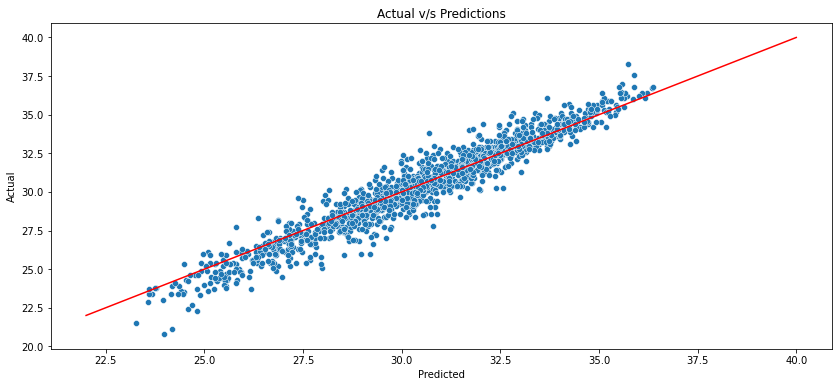

In [101]:
# plot LOO predictions against actual
plt.figure(figsize=[14,6])

plot_LOO = sns.scatterplot(Predictions_t_max,y_test)
plot_LOO.set(xlabel='Predicted', ylabel='Actual')
# generate and graph y = x line
x_plot = np.linspace(22,40)
y_plot = x_plot

plt.plot(x_plot, y_plot, color='r')
plt.title("Actual v/s Predictions")
plt.show()

We could see that most of the prediction were apprximately correct.

##### We can also have many more test data for predicting "Next_Tmax"

----------------

## Target Column: "Next_Tmin" (Y_min)

#### Finding the Best Random State

In [49]:
from sklearn.linear_model import LinearRegression

maxR2_Score1 = 0
maxRS1 = 0

for i in range(200):
    x1_train,x1_test,y1_train,y1_test = train_test_split(X_scaled,Y_min,test_size = 0.20,random_state = i)
    LR1 = LinearRegression()
    LR1.fit(x1_train,y1_train)
    predlr = LR1.predict(x1_test)
    Score = r2_score(y1_test,predlr)
    if Score>maxR2_Score1:
        maxR2_Score1 = Score
        maxRS1 = i
        
print('The best accuracy is ',maxR2_Score1, ' with Random State ',maxRS1)

The best accuracy is  0.8429650028366686  with Random State  172


### Splitting Training and Testing data

In [50]:
x1_train,x1_test,y1_train,y1_test = train_test_split(X_scaled, Y_min, test_size =0.20, random_state = maxRS1)

# Model Building

LinearRegression()
R Squared (R2):  84.29650028366686
Mean Squared Error (MSE):  0.9948614075070481
Root Mean Squared Error (RMSE):  0.997427394604263
Mean Absolute Error (MAE):  0.7726916331107666


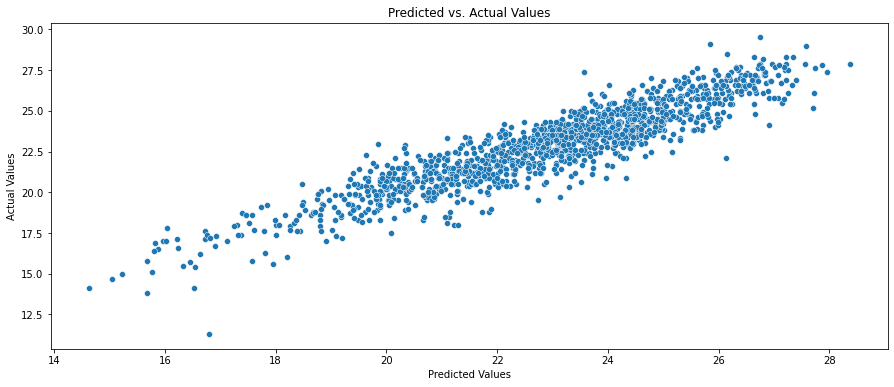

------------------------------------------------------------------------------------------------------------------------
DecisionTreeRegressor()
R Squared (R2):  81.87566148604789
Mean Squared Error (MSE):  1.148228436325594
Root Mean Squared Error (RMSE):  1.0715542152992512
Mean Absolute Error (MAE):  0.7752101794223081


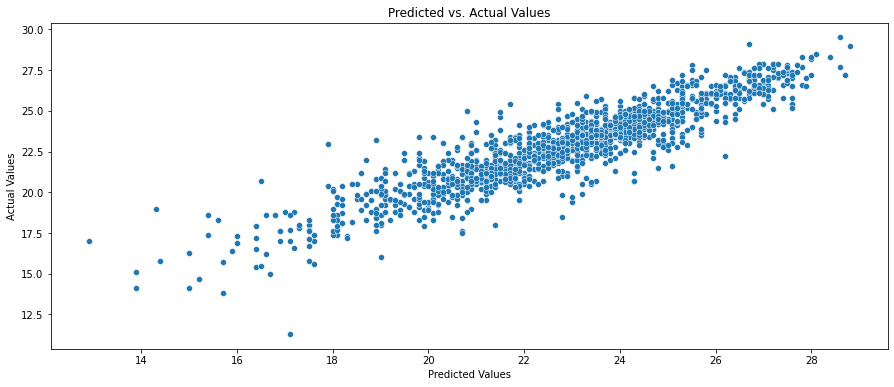

------------------------------------------------------------------------------------------------------------------------
RandomForestRegressor()
R Squared (R2):  91.69453806824033
Mean Squared Error (MSE):  0.5261746551205105
Root Mean Squared Error (RMSE):  0.7253789734480249
Mean Absolute Error (MAE):  0.5502304434795338


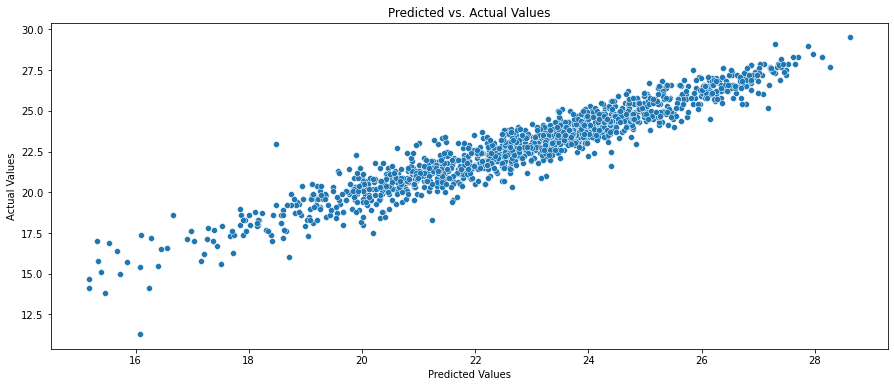

------------------------------------------------------------------------------------------------------------------------
KNeighborsRegressor()
R Squared (R2):  88.39858716999683
Mean Squared Error (MSE):  0.7349825265461502
Root Mean Squared Error (RMSE):  0.8573112191883121
Mean Absolute Error (MAE):  0.6633888499362276


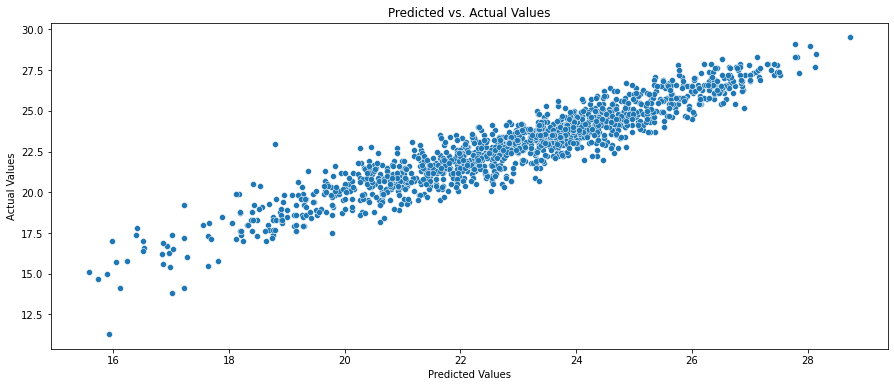

------------------------------------------------------------------------------------------------------------------------
AdaBoostRegressor()
R Squared (R2):  81.95027655384541
Mean Squared Error (MSE):  1.143501359386619
Root Mean Squared Error (RMSE):  1.0693462298931151
Mean Absolute Error (MAE):  0.8618369555525877


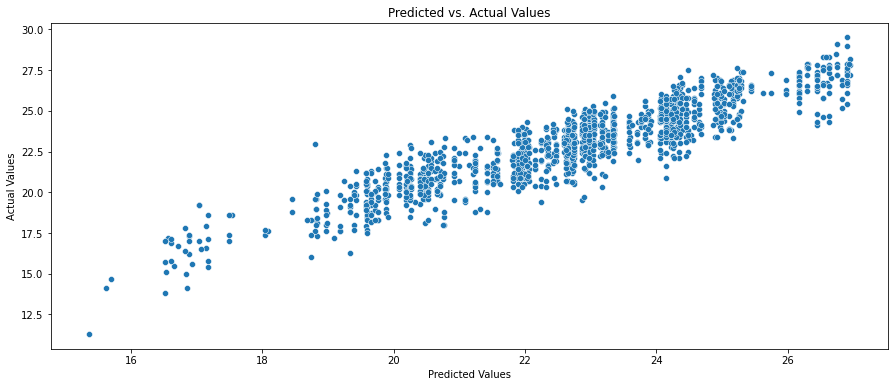

------------------------------------------------------------------------------------------------------------------------
GradientBoostingRegressor()
R Squared (R2):  90.16028581977585
Mean Squared Error (MSE):  0.6233739023552316
Root Mean Squared Error (RMSE):  0.7895403107854795
Mean Absolute Error (MAE):  0.6101193046547077


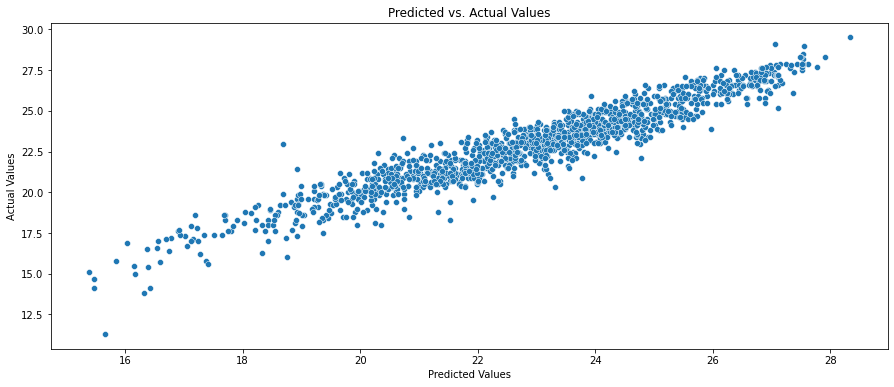

------------------------------------------------------------------------------------------------------------------------
Ridge()
R Squared (R2):  84.29620553809536
Mean Squared Error (MSE):  0.9948800804780044
Root Mean Squared Error (RMSE):  0.9974367551268624
Mean Absolute Error (MAE):  0.7727062833943721


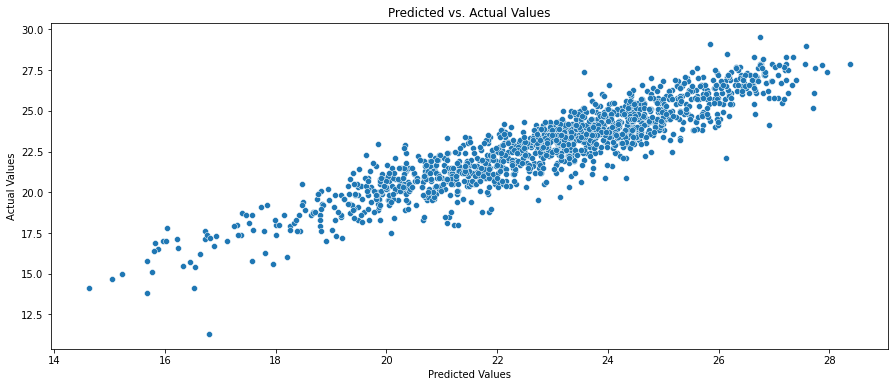

------------------------------------------------------------------------------------------------------------------------


In [53]:
lr1=LinearRegression()
dt1=DecisionTreeRegressor()
rf1=RandomForestRegressor()
kn1=KNeighborsRegressor()
ab1=AdaBoostRegressor()
gb1=GradientBoostingRegressor()
#ls1=Lasso()
rd1=Ridge()

models=[lr1,dt1,rf1,kn1,ab1,gb1,rd1]
kf1 = KFold(n_splits=5, random_state=54, shuffle=True)

train=[]
test=[]
cv=[]

for m in models:
    m = m.fit(x1_train,y1_train)
    pred_train=m.predict(x1_train)
    pred_test=m.predict(x1_test)
    train_score=r2_score(y1_train,pred_train)
    train.append(train_score*100)
    test_score=r2_score(y1_test,pred_test)
    test.append(test_score*100)
    
    print(m)
    print('R Squared (R2): ',test_score*100)
    print('Mean Squared Error (MSE): ',mean_squared_error(y1_test,pred_test))
    print('Root Mean Squared Error (RMSE): ',np.sqrt(mean_squared_error(y1_test, pred_test)))
    print('Mean Absolute Error (MAE): ',mean_absolute_error(y1_test,pred_test))
    
    score=cross_val_score(m,X_scaled,Y_min,cv=kf1)
    cv.append(score.mean()*100)
    
    plt.figure(figsize=[15,6])
    sns.scatterplot(x=pred_test, y=y1_test)
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title('Predicted vs. Actual Values')
    plt.show()
    print('-'*120)
    
    
    
    
Overall_score1={'Model':['Linear Regression','DecisionTree','RandomForest','KNN','AdaBoost','GradientBoosting','Ridge'],
             'Training Score':train,
            'Test Score':test,
            'Cross Validation Score': cv}
Overall_score1=pd.DataFrame(data=Overall_score1)

##### Let's check for our Overall scores of our models:

In [54]:
Overall_score1   

Model  Training Score  Test Score  Cross Validation Score
0  Linear Regression       82.007416   84.296500               82.386480
1       DecisionTree      100.000000   81.875661               78.087843
2       RandomForest       98.591567   91.694538               90.342432
3                KNN       91.224131   88.398587               87.110913
4           AdaBoost       80.364456   81.950277               79.670964
5   GradientBoosting       90.258771   90.160286               88.836702
6              Ridge       82.007390   84.296206               82.386581

In [55]:
#Let's get a new column, that shows the difference between Prediction Test R2 Score and Cross Validation Score

Overall_score1['Difference'] = Overall_score1['Test Score'] - Overall_score1['Cross Validation Score']

In [56]:
Overall_score1

Model  Training Score  Test Score  Cross Validation Score  \
0  Linear Regression       82.007416   84.296500               82.386480   
1       DecisionTree      100.000000   81.875661               78.087843   
2       RandomForest       98.591567   91.694538               90.342432   
3                KNN       91.224131   88.398587               87.110913   
4           AdaBoost       80.364456   81.950277               79.670964   
5   GradientBoosting       90.258771   90.160286               88.836702   
6              Ridge       82.007390   84.296206               82.386581   

   Difference  
0    1.910020  
1    3.787818  
2    1.352106  
3    1.287674  
4    2.279313  
5    1.323584  
6    1.909624

In [57]:
Overall_score1['Difference'].min()  #Find the value with least difference in "Difference Column"

1.2876738261720817

In [58]:
#Let's check the row that has the least difference value in "Difference Column"

Overall_score1[Overall_score1['Difference']==1.2876738261720817]

Model  Training Score  Test Score  Cross Validation Score  Difference
3   KNN       91.224131   88.398587               87.110913    1.287674

##### "KNeighbors Regressor" model comes up with "high R2_score" and with least difference between the R2 Score and  the Cross validation score

## "KNeighbors Regressor" is our best model for predicting "Next_Tmin"

Let's hyper tune our model to increase the R2_score

### Hyper Tuning the Model

In [60]:
#Importing library
from sklearn.model_selection import GridSearchCV


param_grid={'algorithm': ['brute','kd_tree'],'p':[1],'leaf_size': [15,20,25,30],'metric':['minkowski','manhattan'],
            'weights':['uniform','distance'],'n_neighbors': [1,5,7,11],'n_jobs' : [-1]}

gridsearch=GridSearchCV(estimator=kn1,param_grid=param_grid,cv=5)

gridsearch.fit(x1_train,y1_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['brute', 'kd_tree'],
                         'leaf_size': [15, 20, 25, 30],
                         'metric': ['minkowski', 'manhattan'], 'n_jobs': [-1],
                         'n_neighbors': [1, 5, 7, 11], 'p': [1],
                         'weights': ['uniform', 'distance']})

In [61]:
print(gridsearch.best_score_, gridsearch.best_params_) #Get the best [parameters]

0.8888059342792122 {'algorithm': 'brute', 'leaf_size': 15, 'metric': 'minkowski', 'n_jobs': -1, 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}


In [62]:
Kneighbor = KNeighborsRegressor(algorithm = 'brute', leaf_size = 15, metric = 'minkowski', n_jobs = -1, 
                                 n_neighbors = 7, p =  1, weights = 'distance')

Kneighbor.fit(x1_train,y1_train)  #Training the model with the hypertuing parameter


KNeighborsRegressor(algorithm='brute', leaf_size=15, n_jobs=-1, n_neighbors=7,
                    p=1, weights='distance')

In [63]:
predictions_Tmin = Kneighbor.predict(x1_test)  #Predicting the model with the hypertuing parameter

### Saving the model for future predictions

In [66]:
import joblib

joblib.dump(Kneighbor,'Tmin_Predictions.obj')

['Tmin_Predictions.obj']

### Performence Metrics

In [64]:
print('R Squared (R2): ',r2_score(y1_test,predictions_Tmin))
print('Mean Squared Error (MSE): ',mean_squared_error(y1_test,predictions_Tmin))
print('Root Mean Squared Error (RMSE): ',np.sqrt(mean_squared_error(y1_test, predictions_Tmin)))
print('Mean Absolute Error (MAE): ',mean_absolute_error(y1_test,predictions_Tmin))


R Squared (R2):  0.9087109269918239
Mean Squared Error (MSE):  0.5783422632119793
Root Mean Squared Error (RMSE):  0.7604881742749057
Mean Absolute Error (MAE):  0.5907626119328302


#### Our model score got increased by 2.5%

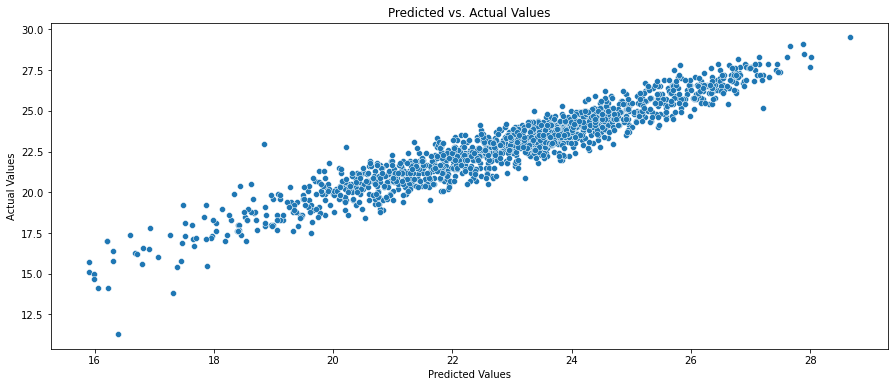

In [67]:
#plot predicted vs. actual values

plt.figure(figsize=[15,6])
sns.scatterplot(x=predictions_Tmin, y=y1_test)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Predicted vs. Actual Values')
plt.show()

### Loading the saved Model for predictions

In [68]:
#Load the saved model
import joblib

loaded_model1 = joblib.load(open('Tmin_Predictions.obj','rb'))

In [70]:
# Predict the Labels using the reloaded Model
Predictions_t_min = loaded_model1.predict(x1_test)


pd.set_option ('display.max_rows', None)

Predictions_tmin = pd.DataFrame(Predictions_t_min,columns = ['Predicted_tmin'])
Predictions_tmin

Predicted_tmin
0          24.312242
1          21.502030
2          21.290791
3          22.960472
4          22.007743
5          23.135080
6          19.779041
7          23.354306
8          23.326973
9          25.584916
10         24.120698
11         19.868846
12         22.633643
13         24.591291
14         23.431876
15         22.459736
16         26.802359
17         23.674559
18         21.908679
19         26.430257
20         18.860770
21         22.025177
22         22.668581
23         17.659118
24         24.124272
25         26.734239
26         21.627046
27         22.972819
28         25.162391
29         23.643170
30         20.005961
31         24.292723
32         24.273663
33         20.121499
34         20.836613
35         24.110942
36         24.481207
37         24.003431
38         20.739652
39         25.453171
40         21.484251
41         16.050430
42         18.865831
43         25.136345
44         21.709754
45         23.839810
46         21.853386
47         24.332446
48         22.293623
49         22.253895
50         23.634342
51         23.096161
52         24.576599
53         22.353601
54         22.841157
55         21.227553
56         23.374307
57         22.681998
58         24.042171
59         24.088775
60         21.434586
61         24.578774
62         25.117859
63         24.242268
64         23.325713
65         26.073232
66         24.081541
67         23.457974
68         23.915307
69         20.978247
70         25.205143
71         24.482540
72         23.489292
73         25.077537
74         24.965332
75         18.852655
76         23.837093
77         26.262535
78         22.942036
79         20.364131
80         25.079063
81         20.339285
82         22.320082
83         20.335661
84         23.545418
85         22.822912
86         27.067754
87         26.181414
88         21.084015
89         18.666848
90         24.491619
91         21.510592
92         19.437006
93         19.757276
94         24.381346
95         21.279556
96         19.329769
97         23.654983
98         22.468290
99         23.621142
100        21.659812
101        21.566475
102        26.553924
103        20.204031
104        22.732296
105        19.500863
106        25.556719
107        20.276368
108        20.161944
109        23.476661
110        20.177887
111        23.467590
112        24.826424
113        24.962698
114        19.693901
115        21.957609
116        24.185039
117        24.430484
118        20.886461
119        24.021259
120        19.879700
121        23.625342
122        20.484376
123        20.987953
124        24.932526
125        19.103023
126        20.346095
127        25.403753
128        24.441281
129        27.434415
130        23.655537
131        18.527780
132        23.095604
133        22.510092
134        21.692351
135        24.556068
136        20.722472
137        25.479307
138        21.513068
139        19.889196
140        22.605530
141        24.505370
142        24.231755
143        25.091789
144        17.968069
145        22.163328
146        23.602354
147        24.489906
148        24.442255
149        24.368097
150        24.420089
151        21.783825
152        21.156813
153        16.390395
154        21.564660
155        23.674851
156        26.877075
157        21.621554
158        26.137354
159        21.695224
160        20.599877
161        19.273052
162        22.669727
163        23.579415
164        21.315135
165        22.106559
166        21.916760
167        22.204241
168        25.701609
169        25.013533
170        20.427311
171        24.529461
172        16.814323
173        23.052090
174        20.757093
175        23.894911
176        21.628717
177        21.314877
178        23.909079
179        17.469206
180        20.207674
181        22.667903
182        23.488846
183        25.934752
184        18.699705
185        19.476778
186        23.837615
187        22.357518
188        23.863435
189        20.92

In [71]:
#create dataframe of actual and predicted values

list_of_tuples = list(zip(y1_test, Predictions_t_min))
Minimum_Temperature = pd.DataFrame(list_of_tuples, columns = ['Actual', 'Predicted'])

In [72]:
Minimum_Temperature

Actual  Predicted
0     24.80000  24.312242
1     21.20000  21.502030
2     21.90000  21.290791
3     22.70000  22.960472
4     21.70000  22.007743
5     22.70000  23.135080
6     18.70000  19.779041
7     24.30000  23.354306
8     23.70000  23.326973
9     24.60000  25.584916
10    24.30000  24.120698
11    19.90000  19.868846
12    23.20000  22.633643
13    25.20000  24.591291
14    21.80000  23.431876
15    21.80000  22.459736
16    27.30000  26.802359
17    23.10000  23.674559
18    21.50000  21.908679
19    26.90000  26.430257
20    19.10000  18.860770
21    22.80000  22.025177
22    22.00000  22.668581
23    16.70000  17.659118
24    24.90000  24.124272
25    27.40000  26.734239
26    19.50000  21.627046
27    23.70000  22.972819
28    24.90000  25.162391
29    22.90000  23.643170
30    19.90000  20.005961
31    24.30000  24.292723
32    24.80000  24.273663
33    19.80000  20.121499
34    18.90000  20.836613
35    23.60000  24.110942
36    22.80000  24.481207
37    24.20000  24.003431
38    19.80000  20.739652
39    25.30000  25.453171
40    20.40000  21.484251
41    14.10000  16.050430
42    17.90000  18.865831
43    25.50000  25.136345
44    21.40000  21.709754
45    23.40000  23.839810
46    20.70000  21.853386
47    24.50000  24.332446
48    22.60000  22.293623
49    22.40000  22.253895
50    23.70000  23.634342
51    23.20000  23.096161
52    24.50000  24.576599
53    22.00000  22.353601
54    22.60000  22.841157
55    19.90000  21.227553
56    22.90000  23.374307
57    22.40000  22.681998
58    23.80000  24.042171
59    24.00000  24.088775
60    21.90000  21.434586
61    24.30000  24.578774
62    25.90000  25.117859
63    25.00000  24.242268
64    22.40000  23.325713
65    27.10000  26.073232
66    24.00000  24.081541
67    23.20000  23.457974
68    23.30000  23.915307
69    21.90000  20.978247
70    24.90000  25.205143
71    24.90000  24.482540
72    23.20000  23.489292
73    24.40000  25.077537
74    24.10000  24.965332
75    18.10000  18.852655
76    22.00000  23.837093
77    26.60000  26.262535
78    22.50000  22.942036
79    20.90000  20.364131
80    24.80000  25.079063
81    19.50000  20.339285
82    21.20000  22.320082
83    19.60000  20.335661
84    24.00000  23.545418
85    23.80000  22.822912
86    27.50000  27.067754
87    26.60000  26.181414
88    20.20000  21.084015
89    18.70000  18.666848
90    24.90000  24.491619
91    21.50000  21.510592
92    18.60000  19.437006
93    19.10000  19.757276
94    25.20000  24.381346
95    21.30000  21.279556
96    18.80000  19.329769
97    24.20000  23.654983
98    21.50000  22.468290
99    23.20000  23.621142
100   21.50000  21.659812
101   21.70000  21.566475
102   26.30000  26.553924
103   20.20000  20.204031
104   22.30000  22.732296
105   19.80000  19.500863
106   24.80000  25.556719
107   20.30000  20.276368
108   20.50000  20.161944
109   23.80000  23.476661
110   19.50000  20.177887
111   23.70000  23.467590
112   24.90000  24.826424
113   25.00000  24.962698
114   20.70000  19.693901
115   22.10000  21.957609
116   23.70000  24.185039
117   24.20000  24.430484
118   20.40000  20.886461
119   23.60000  24.021259
120   20.40000  19.879700
121   23.30000  23.625342
122   21.20000  20.484376
123   21.90000  20.987953
124   24.30000  24.932526
125   19.60000  19.103023
126   20.40000  20.346095
127   25.50000  25.403753
128   24.10000  24.441281
129   27.50000  27.434415
130   23.80000  23.655537
131   18.50000  18.527780
132   21.80000  23.095604
133   23.20000  22.510092
134   20.90000  21.692351
135   26.20000  24.556068
136   19.60000  20.722472
137   24.80000  25.479307
138   22.00000  21.513068
139   20.30000  19.889196
140   21.80000  22.605530
141   24.80000  24.505370
142   25.60000  24.231755
143   25.00000  25.091789
144   17.30000  17.968069
145   22.80000  22.163328
146   24.30000  23.602354
147   23.70000  24.489906
148   24.40000  24.442255
149   24.10000  24.368097
150   25.10000  24.420089
151   21.30000  21.783825
152   21.50000  21.156813
153 

In [ ]:
#Let's compare the actualthe predicted values by using graph

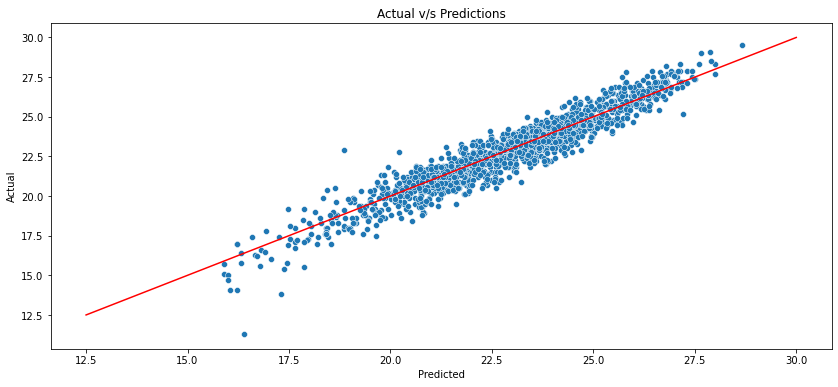

In [92]:
# plot LOO predictions against actual
plt.figure(figsize=[14,6])

plot_LOO = sns.scatterplot(Predictions_t_min,y1_test)
plot_LOO.set(xlabel='Predicted', ylabel='Actual')
# generate and graph y = x line
x_plot = np.linspace(12.5,30)
y_plot = x_plot

plt.plot(x_plot, y_plot, color='r')
plt.title("Actual v/s Predictions")
plt.show()

In [93]:
# Calculate the accuracy score and predict target values

# Calculate the Score 
score = loaded_model1.score(x1_test,y1_test) 

# Print the Score
print("Test score: {0:.2f} %".format(100 * score))


Test score: 90.87 %


We could see that most of the prediction were apprximately correct.

#### We can also have many more test data for predicting "Next_Tmin"

---------------------

---------------------

## We have built 2 models and saved the models for predicting "Next_Tmax" with 92.15% accuracy and "Next_Tmin" with 90.87% accuracy

-----------------